In [1]:
# importing needed modules
import numpy as np
import pandas as pd
import sklearn as sk
# from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from scipy.special import huber
import tensorflow as tf
import seaborn as sns


2023-01-26 19:15:23.993278: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 19:15:27.407650: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-26 19:15:27.407828: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-26 19:15:27.407844: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
# reading the dataset
df = pd.read_csv("traffic.csv",parse_dates=True, index_col='DateTime')
colors = [ "#5AECDE","#D985BB","#9BC7FF","#40863C"]
df

Junction  Vehicles           ID
DateTime                                            
2015-11-01 00:00:00         1        15  20151101001
2015-11-01 01:00:00         1        13  20151101011
2015-11-01 02:00:00         1        10  20151101021
2015-11-01 03:00:00         1         7  20151101031
2015-11-01 04:00:00         1         9  20151101041
...                       ...       ...          ...
2017-06-30 19:00:00         4        11  20170630194
2017-06-30 20:00:00         4        30  20170630204
2017-06-30 21:00:00         4        16  20170630214
2017-06-30 22:00:00         4        22  20170630224
2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 3 columns]

In [3]:
# splitting junctions
df1 = df[df["Junction"] == 1]
df2 = df[df["Junction"] == 2]
df3 = df[df["Junction"] == 3]
df4 = df[df["Junction"] == 4]


df1 = df1[['Vehicles']]
df2 = df2[['Vehicles']]
df3 = df3[['Vehicles']]
df4 = df4[['Vehicles']]

In [4]:
df['Year'] = pd.Series(df.index).apply(lambda x: x.year).to_list()
df['Month'] = pd.Series(df.index).apply(lambda x: x.month).to_list()
df['Day'] = pd.Series(df.index).apply(lambda x: x.day).to_list()
df['Hour'] = pd.Series(df.index).apply(lambda x: x.hour).to_list()
df

Junction  Vehicles           ID  Year  Month  Day  Hour
DateTime                                                                    
2015-11-01 00:00:00         1        15  20151101001  2015     11    1     0
2015-11-01 01:00:00         1        13  20151101011  2015     11    1     1
2015-11-01 02:00:00         1        10  20151101021  2015     11    1     2
2015-11-01 03:00:00         1         7  20151101031  2015     11    1     3
2015-11-01 04:00:00         1         9  20151101041  2015     11    1     4
...                       ...       ...          ...   ...    ...  ...   ...
2017-06-30 19:00:00         4        11  20170630194  2017      6   30    19
2017-06-30 20:00:00         4        30  20170630204  2017      6   30    20
2017-06-30 21:00:00         4        16  20170630214  2017      6   30    21
2017-06-30 22:00:00         4        22  20170630224  2017      6   30    22
2017-06-30 23:00:00         4        12  20170630234  2017      6   30    23

[48120 rows x 7 columns]

Text(0.5, 0, 'Date')

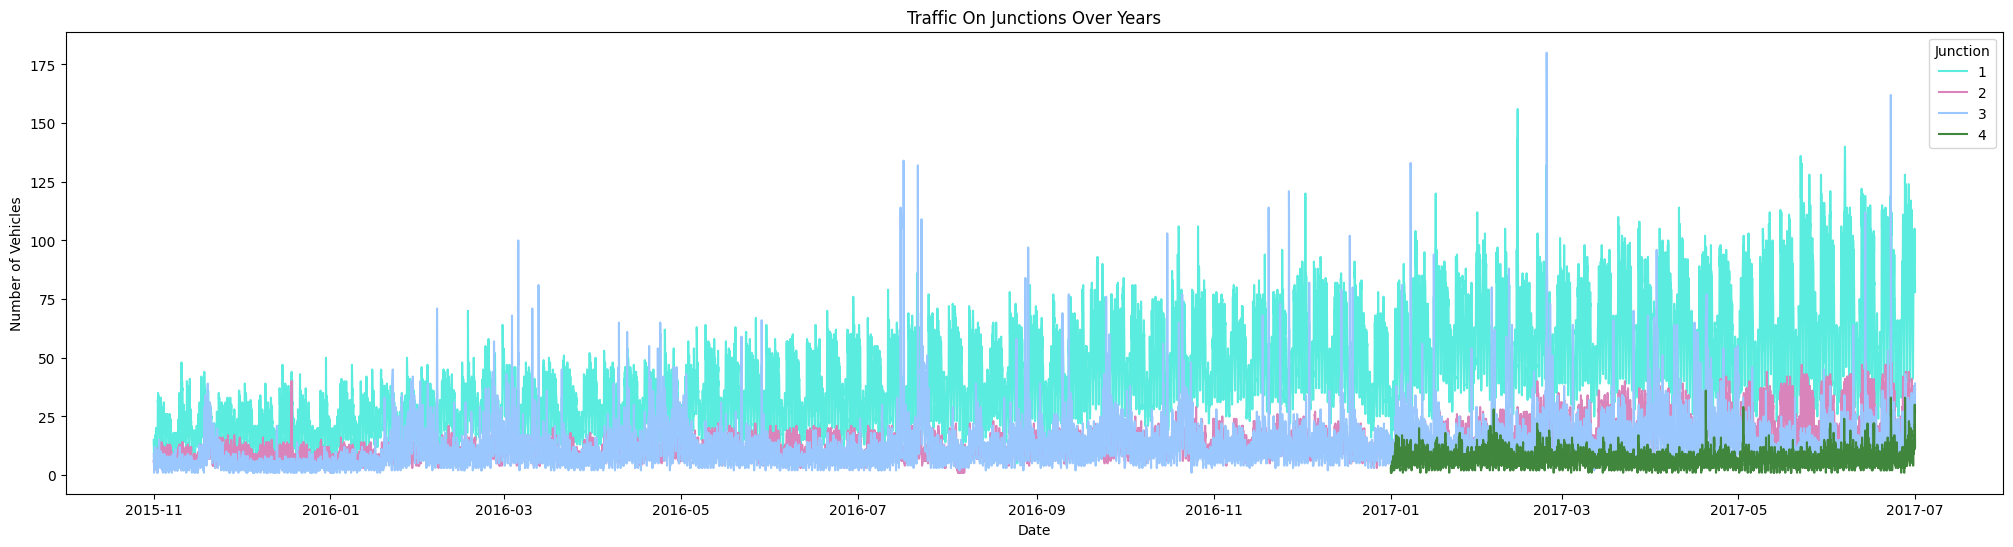

In [5]:
plt.figure(figsize=(25,6))
plot=sns.lineplot(x=df.index,y="Vehicles",data=df, hue="Junction",palette=colors)
plot.set_title("Traffic On Junctions Over Years")
plot.set_ylabel("Number of Vehicles")
plot.set_xlabel("Date")

Text(0.5, 0, 'Date')

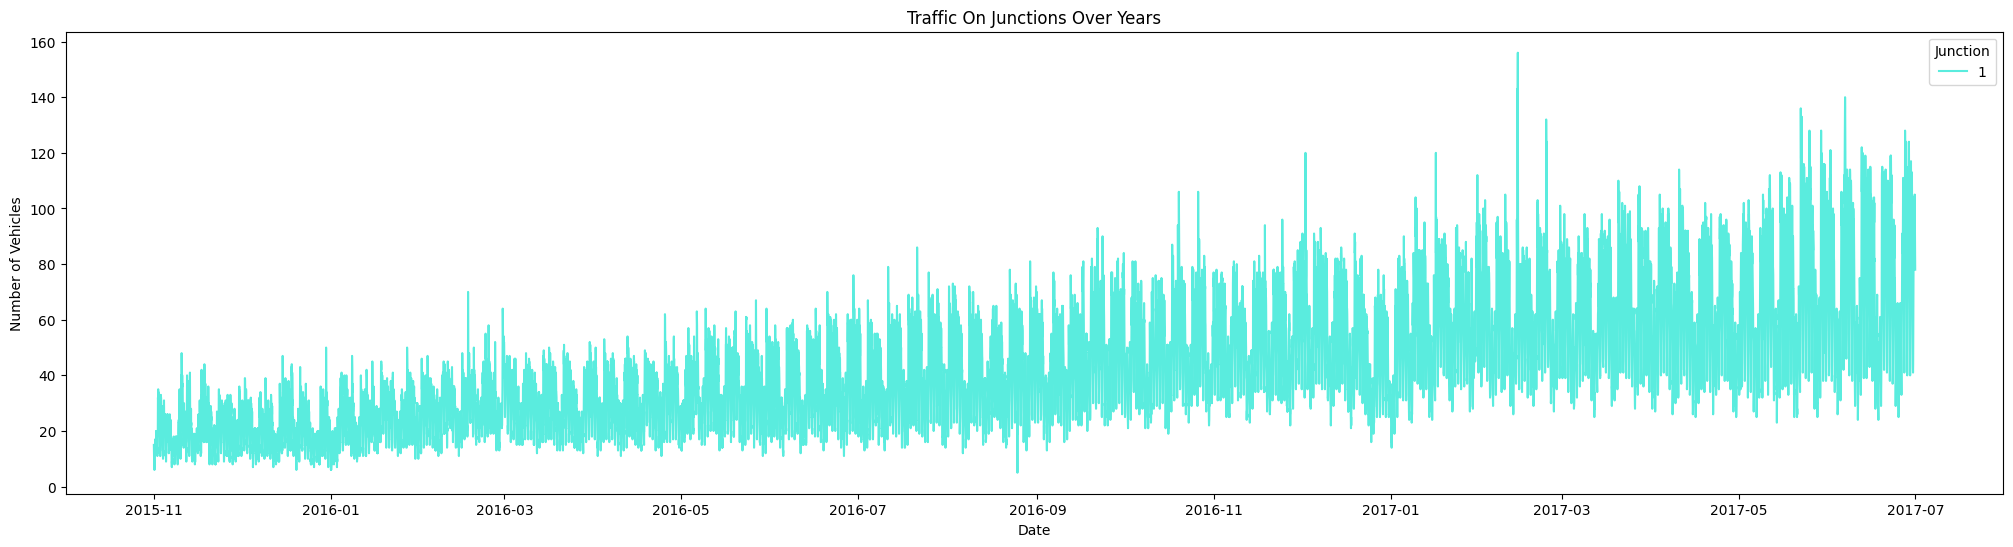

In [6]:
plt.figure(figsize=(25,6))
plot=sns.lineplot(x=df[(df.Junction == 1)].index,y="Vehicles",data=df[(df.Junction == 1)], hue="Junction",palette=[ "#5AECDE"])
plot.set_title("Traffic On Junctions Over Years")
plot.set_ylabel("Number of Vehicles")
plot.set_xlabel("Date")

Text(0.5, 0, 'Date')

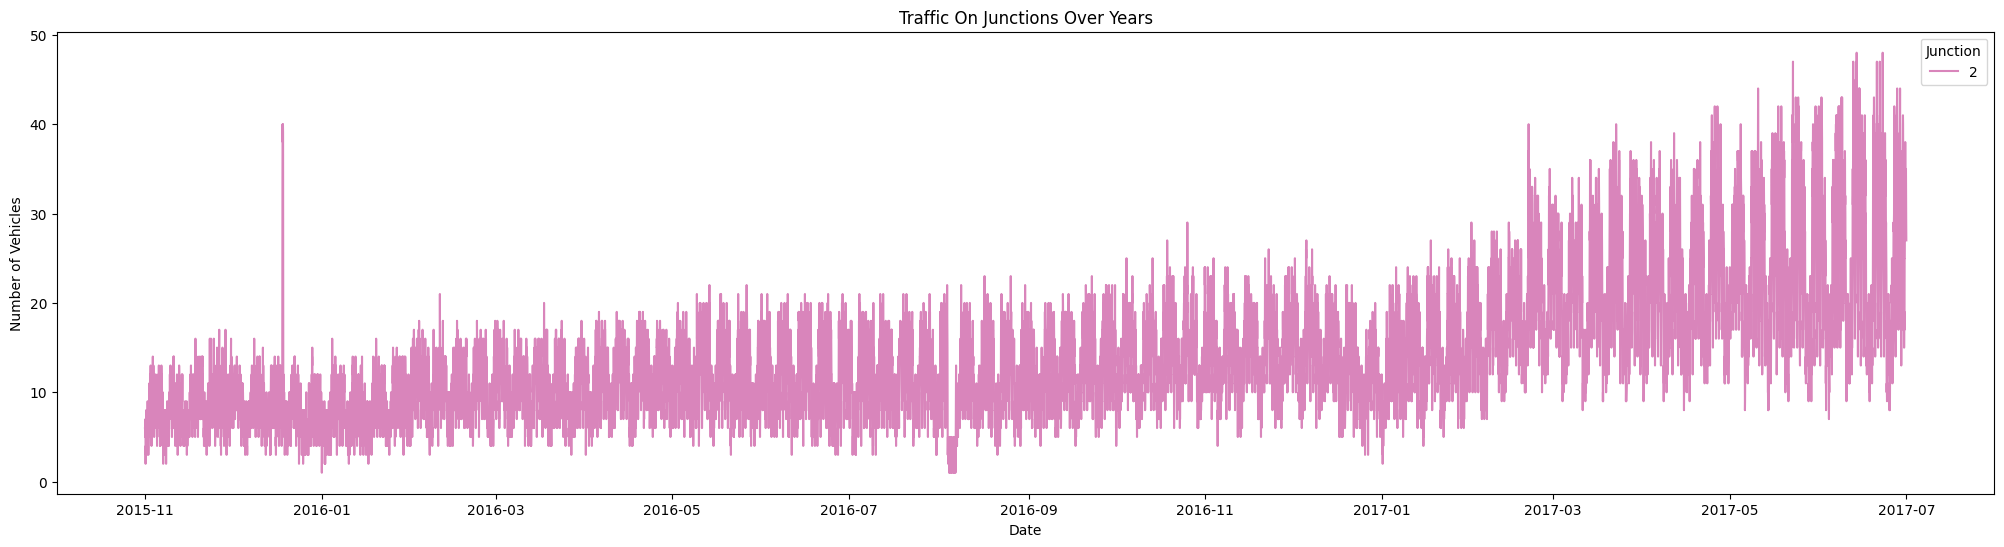

In [7]:
plt.figure(figsize=(25,6))
plot=sns.lineplot(x=df[(df.Junction == 2)].index,y="Vehicles",data=df[(df.Junction == 2)], hue="Junction",palette=[ "#D985BB"])
plot.set_title("Traffic On Junctions Over Years")
plot.set_ylabel("Number of Vehicles")
plot.set_xlabel("Date")

Text(0.5, 0, 'Date')

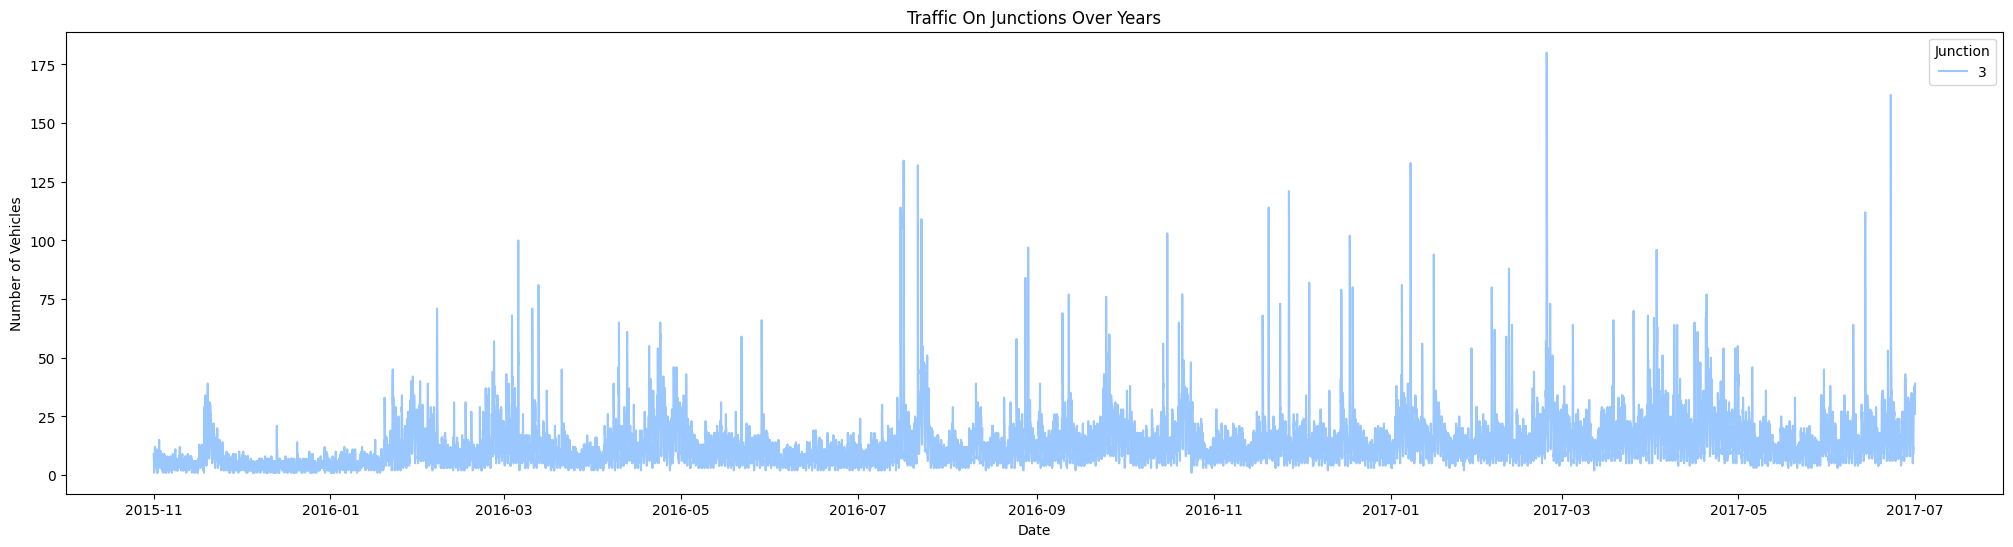

In [8]:
plt.figure(figsize=(25,6))
plot=sns.lineplot(x=df[(df.Junction == 3)].index,y="Vehicles",data=df[(df.Junction == 3)], hue="Junction",palette=[ "#9BC7FF"])
plot.set_title("Traffic On Junctions Over Years")
plot.set_ylabel("Number of Vehicles")
plot.set_xlabel("Date")

Text(0.5, 0, 'Date')

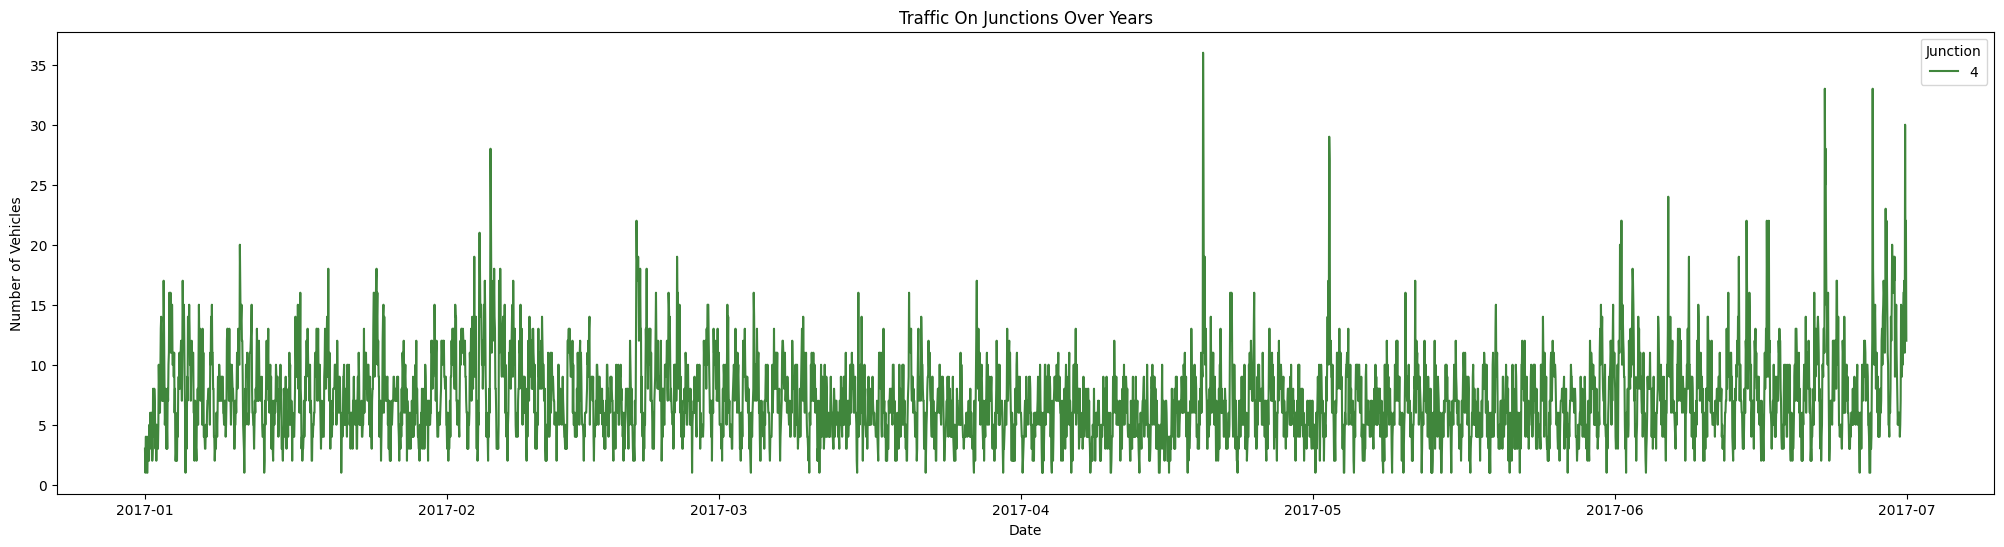

In [9]:
plt.figure(figsize=(25,6))
plot=sns.lineplot(x=df[(df.Junction == 4)].index,y="Vehicles",data=df[(df.Junction == 4)], hue="Junction",palette=["#40863C"])
plot.set_title("Traffic On Junctions Over Years")
plot.set_ylabel("Number of Vehicles")
plot.set_xlabel("Date")

Text(0.5, 0, 'Date')

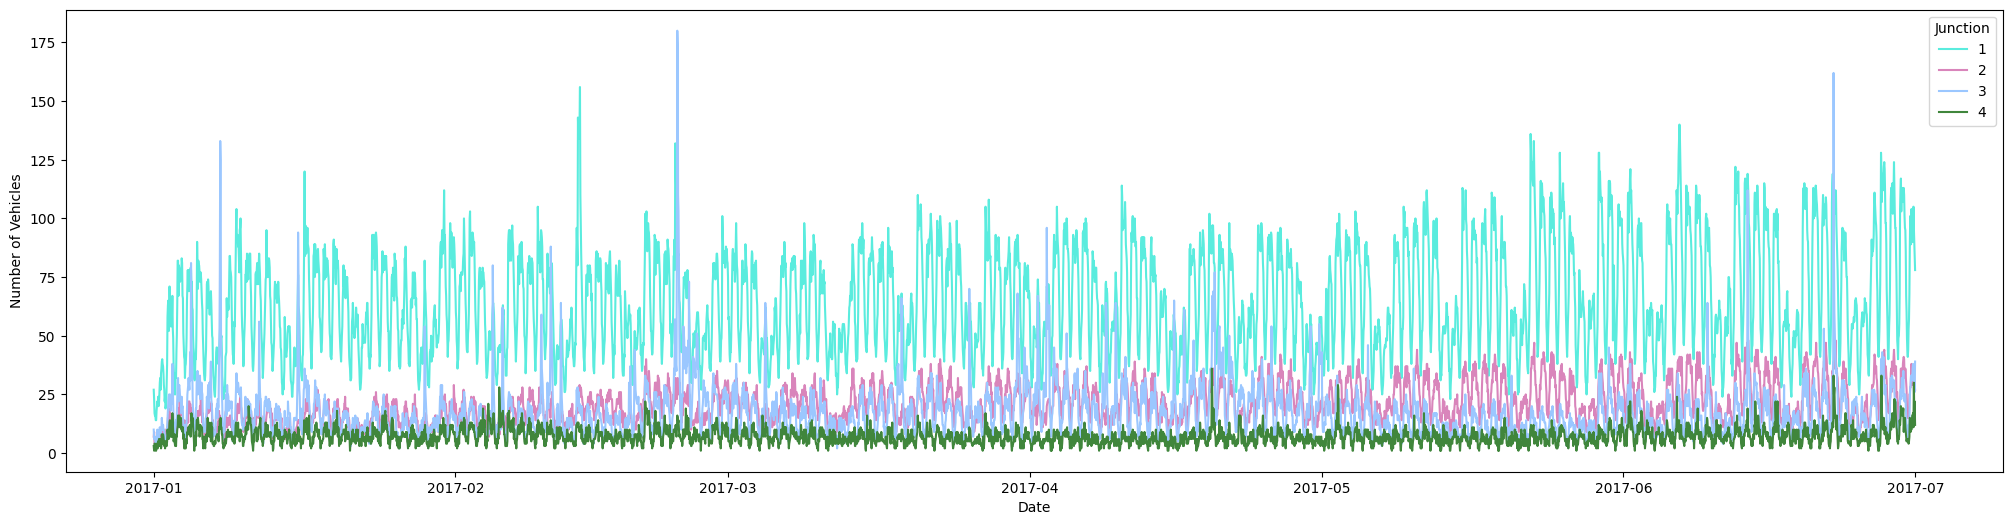

In [10]:
plt.figure(figsize=(25,6))
plot=sns.lineplot(x=df[(df.index >= '2017-01-01 00:00:00') & (df.index < '2017-07-01 00:00:00')].index,y="Vehicles",data=df[(df.index >= '2017-01-01 00:00:00') & (df.index < '2017-07-01 00:00:00')], hue="Junction",palette=colors)
plot.set_ylabel("Number of Vehicles")
plot.set_xlabel("Date")

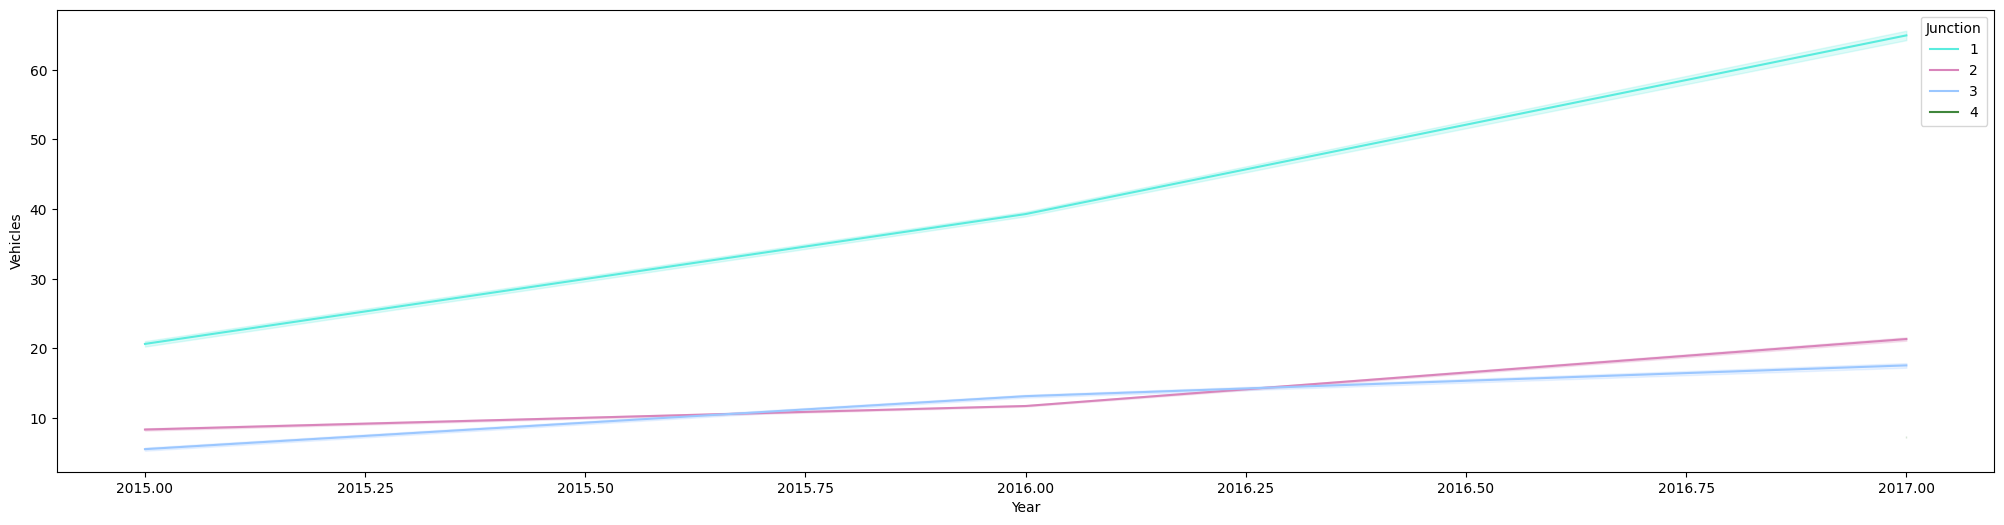

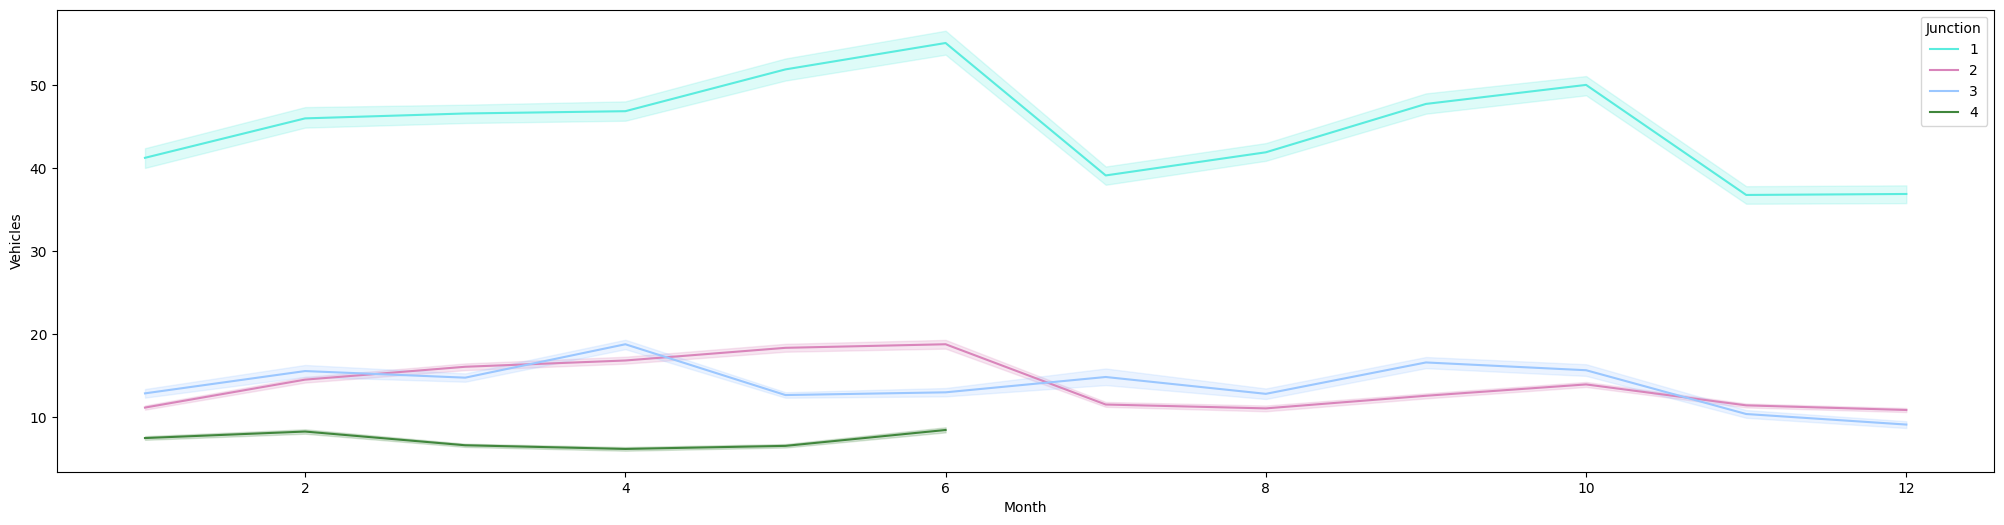

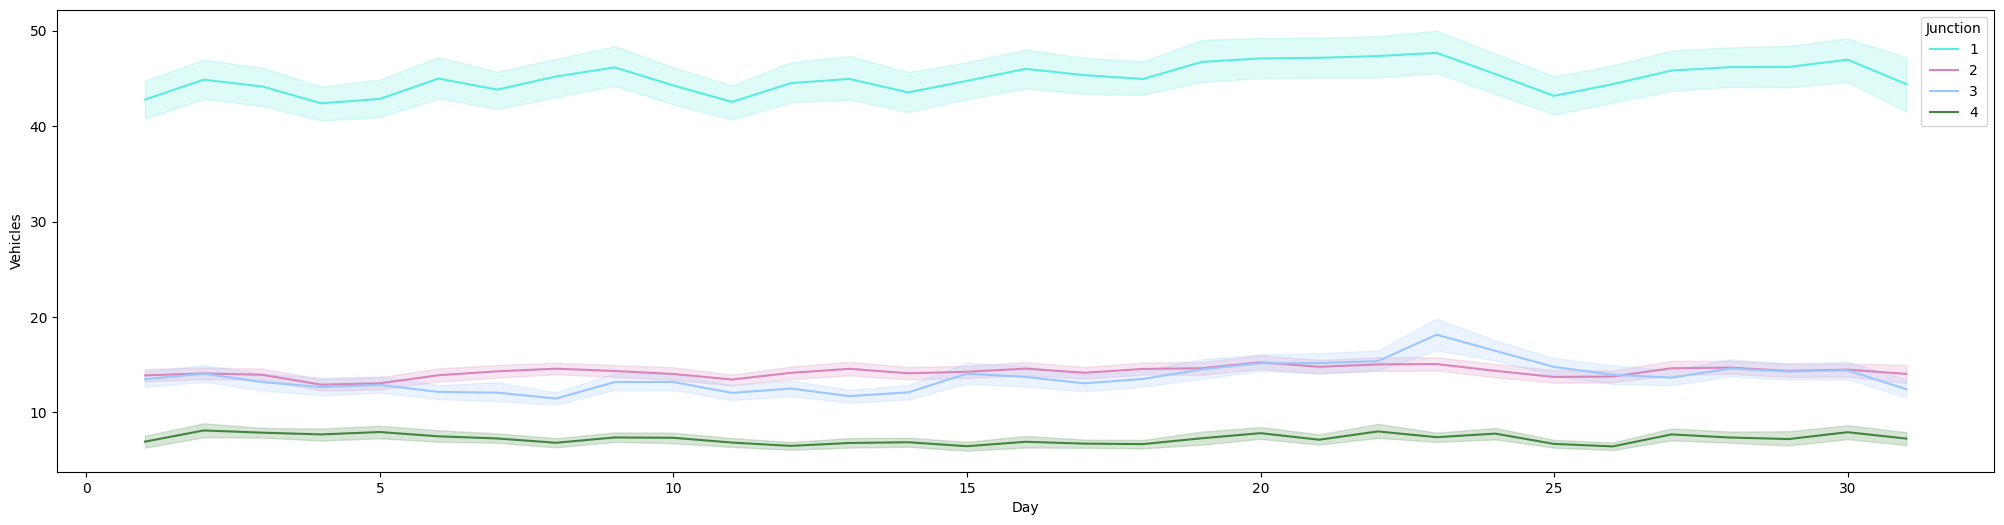

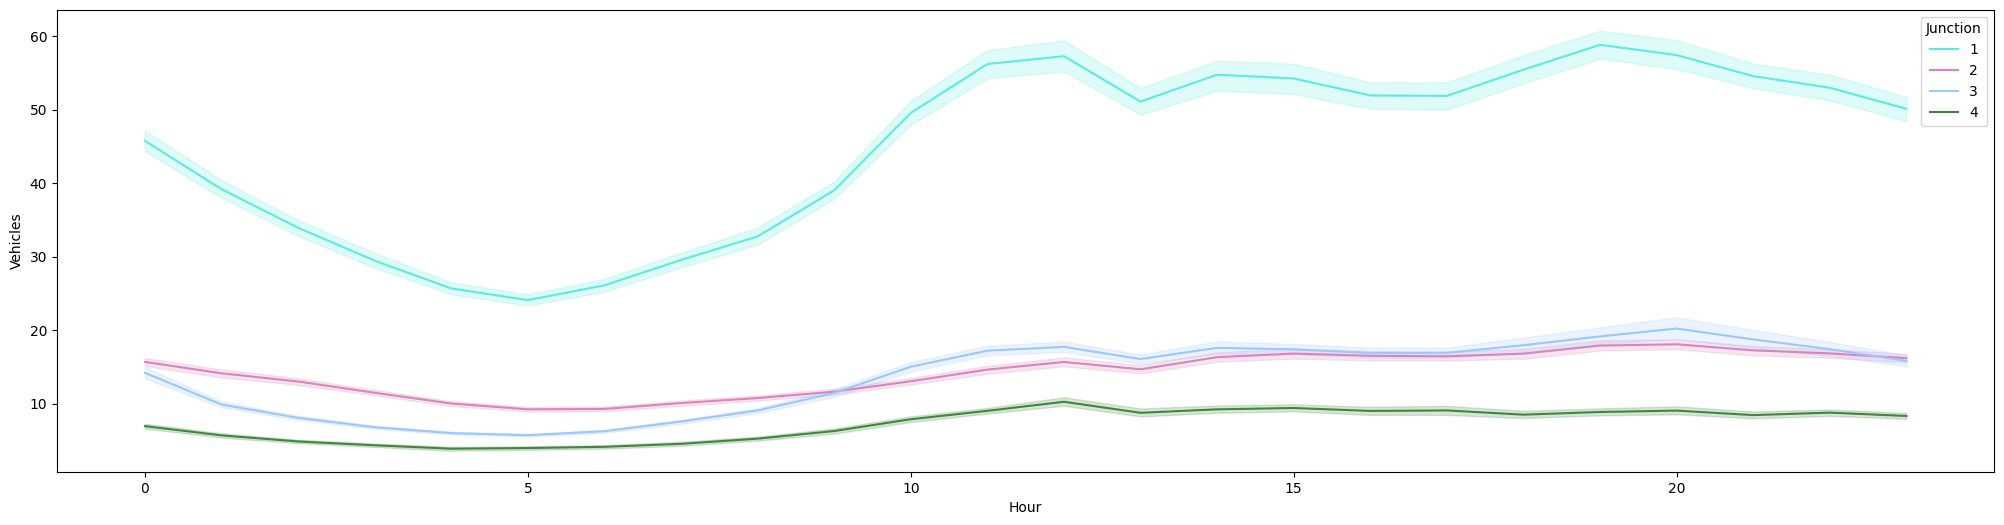

In [11]:
new_features = [ "Year","Month", "Day", "Hour"]

for i in new_features:
    plt.figure(figsize=(25,6))
    ax=sns.lineplot(x=df[i],y="Vehicles",data=df, hue="Junction",palette=colors)

In [12]:
# splitting train and test
train_start_dt = '2015-11-01 00:00:00'
test_start_dt = '2017-06-01 00:00:00'

train1 = df1.copy()[['Vehicles']]
test1 = df1.copy()[df1.index >= test_start_dt][['Vehicles']]

train2 = df2.copy()[['Vehicles']]
test2 = df2.copy()[df2.index >= test_start_dt][['Vehicles']]

train3 = df3.copy()[['Vehicles']]
test3 = df3.copy()[df3.index <= '2015-11-30 23:00:00'][['Vehicles']]

train4 = df4.copy()[['Vehicles']]
test4 = df4.copy()[df4.index >= '2017-06-15 00:00:00'][['Vehicles']]


In [13]:
# scaling vehicle values
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
scaler3 = MinMaxScaler()
scaler4 = MinMaxScaler()


train1['Vehicles'] = scaler1.fit_transform(train1[['Vehicles']])
test1['Vehicles'] = scaler1.transform(test1[['Vehicles']])

train2['Vehicles'] = scaler2.fit_transform(train2[['Vehicles']])
test2['Vehicles'] = scaler2.transform(test2[['Vehicles']])

train3['Vehicles'] = scaler3.fit_transform(train3[['Vehicles']])
test3['Vehicles'] = scaler3.transform(test3[['Vehicles']])

train4['Vehicles'] = scaler4.fit_transform(train4[['Vehicles']])
test4['Vehicles'] = scaler4.transform(test4[['Vehicles']])

In [14]:
# converting dataframe to numpy array
train_data1 = train1.values
test_data1 = test1.values

train_data2 = train2.values
test_data2 = test2.values

train_data3 = train3.values
test_data3 = test3.values

train_data4 = train4.values
test_data4 = test4.values

In [15]:
# timesteps :)
timesteps = 108
train_data1_timesteps=np.array([[j for j in train_data1[i:i+timesteps]] for i in range(0,len(train_data1)-timesteps+1)])[:,:,0]
test_data1_timesteps=np.array([[j for j in test_data1[i:i+timesteps]] for i in range(0,len(test_data1)-timesteps+1)])[:,:,0]

train_data2_timesteps=np.array([[j for j in train_data2[i:i+timesteps]] for i in range(0,len(train_data2)-timesteps+1)])[:,:,0]
test_data2_timesteps=np.array([[j for j in test_data2[i:i+timesteps]] for i in range(0,len(test_data2)-timesteps+1)])[:,:,0]

train_data3_timesteps=np.array([[j for j in train_data3[i:i+timesteps]] for i in range(0,len(train_data3)-timesteps+1)])[:,:,0]
test_data3_timesteps=np.array([[j for j in test_data3[i:i+timesteps]] for i in range(0,len(test_data3)-timesteps+1)])[:,:,0]

train_data4_timesteps=np.array([[j for j in train_data4[i:i+timesteps]] for i in range(0,len(train_data4)-timesteps+1)])[:,:,0]
test_data4_timesteps=np.array([[j for j in test_data4[i:i+timesteps]] for i in range(0,len(test_data4)-timesteps+1)])[:,:,0]

In [16]:
# splitting X and Y for test and train
x_train1, y_train1 = train_data1_timesteps[:,:timesteps-1],train_data1_timesteps[:,[timesteps-1]]
x_test1, y_test1 = test_data1_timesteps[:,:timesteps-1],test_data1_timesteps[:,[timesteps-1]]

x_train2, y_train2 = train_data2_timesteps[:,:timesteps-1],train_data2_timesteps[:,[timesteps-1]]
x_test2, y_test2 = test_data2_timesteps[:,:timesteps-1],test_data2_timesteps[:,[timesteps-1]]

x_train3, y_train3 = train_data3_timesteps[:,:timesteps-1],train_data3_timesteps[:,[timesteps-1]]
x_test3, y_test3 = test_data3_timesteps[:,:timesteps-1],test_data3_timesteps[:,[timesteps-1]]

x_train4, y_train4 = train_data4_timesteps[:,:timesteps-1],train_data4_timesteps[:,[timesteps-1]]
x_test4, y_test4 = test_data4_timesteps[:,:timesteps-1],test_data4_timesteps[:,[timesteps-1]]
x_train1.shape

(14485, 107)

In [17]:
# # fitting svr models
svr1 = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
svr2 = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
svr3 = SVR(kernel='rbf',gamma=0.1, C=1, epsilon = 0.005)
svr4 = SVR(kernel='rbf',gamma=0.1, C=1, epsilon = 0.005)

svr1.fit(x_train1, y_train1[:,0])
svr2.fit(x_train2, y_train2[:,0])
svr3.fit(x_train3, y_train3[:,0])
svr4.fit(x_train4, y_train4[:,0])

SVR(C=1, epsilon=0.005, gamma=0.1)

In [18]:
# fitting rf models
rf1 = RandomForestRegressor()
rf2 = RandomForestRegressor()
rf3 = RandomForestRegressor()
rf4 = RandomForestRegressor()

rf1.fit(x_train1, y_train1[:,0])
rf2.fit(x_train2, y_train2[:,0])
rf3.fit(x_train3, y_train3[:,0])
rf4.fit(x_train4, y_train4[:,0])

RandomForestRegressor()

In [19]:
# R2 score
print(svr1.score(x_test1, y_test1[:,0]))
print(rf1.score(x_test1, y_test1[:,0]))
print(svr2.score(x_test2, y_test2[:,0]))
print(rf2.score(x_test2, y_test2[:,0]))
print(svr3.score(x_test3, y_test3[:,0]))
print(rf3.score(x_test3, y_test3[:,0]))
print(svr4.score(x_test4, y_test4[:,0]))
print(rf4.score(x_test4, y_test4[:,0]))

0.9734741318390838
0.995627595288536
0.9655773396146439
0.9871838453479829
0.7547312365503847
0.9568985524083622
0.6476840529797165
0.9379237813167411


In [20]:
svrp1 = (svr1.predict(x_test1))
print("svr:")
print("MAE:",round(mean_absolute_error( y_test1[:,0],svrp1),4),end="  ")
print("MSE:",round(mean_squared_error( y_test1[:,0],svrp1),4),end="  ")
print("RMSE:",round(mean_squared_error( y_test1[:,0],svrp1,squared=False),4),end="  ")
print("MAPE:",round(mean_absolute_percentage_error( y_test1[:,0],svrp1),4),end="  ")
print("HuberLoss:",round(tf.keras.losses.Huber()(y_test1[:,0], svrp1).numpy(),4))
rfp1 = (rf1.predict(x_test1))
print("rf:")
print("MAE:",round(mean_absolute_error( y_test1[:,0],rfp1),4),end="  ")
print("MSE:",round(mean_squared_error( y_test1[:,0],rfp1),4),end="  ")
print("RMSE:",round(mean_squared_error( y_test1[:,0],rfp1,squared=False),4),end="  ")
print("MAPE:",round(mean_absolute_percentage_error( y_test1[:,0],rfp1),4),end="  ")
print("HuberLoss:",round(tf.keras.losses.Huber()(y_test1[:,0], rfp1).numpy(),4))

svrp2 = (svr2.predict(x_test2))
print("svr:")
print("MAE:",round(mean_absolute_error( y_test2[:,0],svrp2),4),end="  ")
print("MSE:",round(mean_squared_error( y_test2[:,0],svrp2),4),end="  ")
print("RMSE:",round(mean_squared_error( y_test2[:,0],svrp2,squared=False),4),end="  ")
print("MAPE:",round(mean_absolute_percentage_error( y_test2[:,0],svrp2),4),end="  ")
print("HuberLoss:",round(tf.keras.losses.Huber()(y_test2[:,0], svrp2).numpy(),4))
rfp2 = (rf2.predict(x_test2))
print("rf:")
print("MAE:",round(mean_absolute_error( y_test2[:,0],rfp2),4),end="  ")
print("MSE:",round(mean_squared_error( y_test2[:,0],rfp2),4),end="  ")
print("RMSE:",round(mean_squared_error( y_test2[:,0],rfp2,squared=False),4),end="  ")
print("MAPE:",round(mean_absolute_percentage_error( y_test2[:,0],rfp2),4),end="  ")
print("HuberLoss:",round(tf.keras.losses.Huber()(y_test2[:,0], rfp2).numpy(),4))

svrp3 = (svr3.predict(x_test3))
print("svr:")
print("MAE:",round(mean_absolute_error( y_test3[:,0],svrp3),4),end="  ")
print("MSE:",round(mean_squared_error( y_test3[:,0],svrp3),4),end="  ")
print("RMSE:",round(mean_squared_error( y_test3[:,0],svrp3,squared=False),4),end="  ")
print("MAPE:",round(mean_absolute_percentage_error( y_test2[:,0],svrp2),4),end="  ")
print("HuberLoss:",round(tf.keras.losses.Huber()(y_test3[:,0], svrp3).numpy(),4))
rfp3 = (rf3.predict(x_test3))
print("rf:")
print("MAE:",round(mean_absolute_error( y_test3[:,0],rfp3),4),end="  ")
print("MSE:",round(mean_squared_error( y_test3[:,0],rfp3),4),end="  ")
print("RMSE:",round(mean_squared_error( y_test3[:,0],rfp3,squared=False),4),end="  ")
print("MAPE:",round(mean_absolute_percentage_error( y_test2[:,0],rfp2),4),end="  ")
print("HuberLoss:",round(tf.keras.losses.Huber()(y_test3[:,0], rfp3).numpy(),4))

svrp4 = (svr4.predict(x_test4))
print("svr:")
print("MAE:",round(mean_absolute_error( y_test4[:,0],svrp4),4),end="  ")
print("MSE:",round(mean_squared_error( y_test4[:,0],svrp4),4),end="  ")
print("RMSE:",round(mean_squared_error( y_test4[:,0],svrp4,squared=False),4),end="  ")
print("MAPE:",round(mean_absolute_percentage_error( y_test1[:,0],svrp1),4),end="  ")
print("HuberLoss:",round(tf.keras.losses.Huber()(y_test4[:,0], svrp4).numpy(),4))
rfp4 = (rf4.predict(x_test4))
print("rf:")
print("MAE:",round(mean_absolute_error( y_test4[:,0],rfp4),4),end="  ")
print("MSE:",round(mean_squared_error( y_test4[:,0],rfp4),4),end="  ")
print("RMSE:",round(mean_squared_error( y_test4[:,0],rfp4,squared=False),4),end="  ")
print("MAPE:",round(mean_absolute_percentage_error( y_test1[:,0],rfp1),4),end="  ")
print("HuberLoss:",round(tf.keras.losses.Huber()(y_test4[:,0], rfp4).numpy(),4))

svr:
MAE: 0.0249  MSE: 0.0009  RMSE: 0.0296  MAPE: 0.066  

2023-01-26 19:20:28.870251: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 19:20:28.992094: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 19:20:28.992493: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 19:20:28.994010: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

HuberLoss: 0.0004
rf:
MAE: 0.0087  MSE: 0.0001  RMSE: 0.012  MAPE: 0.0196  HuberLoss: 1e-04
svr:
MAE: 0.0352  MSE: 0.0015  RMSE: 0.039  MAPE: 0.0763  HuberLoss: 0.0008
rf:
MAE: 0.0189  MSE: 0.0006  RMSE: 0.0238  MAPE: 0.0393  HuberLoss: 0.0003
svr:
MAE: 0.0114  MSE: 0.0003  RMSE: 0.0162  MAPE: 0.0763  HuberLoss: 1e-04
rf:
MAE: 0.0044  MSE: 0.0  RMSE: 0.0068  MAPE: 0.0393  HuberLoss: 0.0
svr:
MAE: 0.0465  MSE: 0.0076  RMSE: 0.0872  MAPE: 0.066  HuberLoss: 0.0038
rf:
MAE: 0.0243  MSE: 0.0013  RMSE: 0.0366  MAPE: 0.0196  HuberLoss: 0.0007


In [21]:
# predicting next year (2017 - 2018)
df_nextyear_svr_j1 = df1.copy()[(df1.index >= '2017-01-01 00:00:00') & (df1.index < '2017-01-05 12:00:00')][['Vehicles']]
df_nextyear_svr_j2 = df2.copy()[(df2.index >= '2017-01-01 00:00:00') & (df2.index < '2017-01-05 12:00:00')][['Vehicles']]
df_nextyear_svr_j3 = df3.copy()[(df3.index >= '2017-01-01 00:00:00') & (df3.index < '2017-01-05 12:00:00')][['Vehicles']]
df_nextyear_svr_j4 = df4.copy()[(df4.index >= '2017-01-01 00:00:00') & (df4.index < '2017-01-05 12:00:00')][['Vehicles']]

df_nextyear_rf_j1 = df1.copy()[(df1.index >= '2017-01-01 00:00:00') & (df1.index < '2017-01-05 12:00:00')][['Vehicles']]
df_nextyear_rf_j2 = df2.copy()[(df2.index >= '2017-01-01 00:00:00') & (df2.index < '2017-01-05 12:00:00')][['Vehicles']]
df_nextyear_rf_j3 = df3.copy()[(df3.index >= '2017-01-01 00:00:00') & (df3.index < '2017-01-05 12:00:00')][['Vehicles']]
df_nextyear_rf_j4 = df4.copy()[(df4.index >= '2017-01-01 00:00:00') & (df4.index < '2017-01-05 12:00:00')][['Vehicles']]

temp_time = datetime.strptime('2017-01-05 12:00:00', '%Y-%m-%d %H:%M:%S')


df_nextyear_svr_j1['Vehicles'] = scaler1.transform(df_nextyear_svr_j1[['Vehicles']])
df_nextyear_svr_j2['Vehicles'] = scaler2.transform(df_nextyear_svr_j2[['Vehicles']])
df_nextyear_svr_j3['Vehicles'] = scaler3.transform(df_nextyear_svr_j3[['Vehicles']])
df_nextyear_svr_j4['Vehicles'] = scaler4.transform(df_nextyear_svr_j4[['Vehicles']])

df_nextyear_rf_j1['Vehicles'] = scaler1.transform(df_nextyear_rf_j1[['Vehicles']])
df_nextyear_rf_j2['Vehicles'] = scaler2.transform(df_nextyear_rf_j2[['Vehicles']])
df_nextyear_rf_j3['Vehicles'] = scaler3.transform(df_nextyear_rf_j3[['Vehicles']])
df_nextyear_rf_j4['Vehicles'] = scaler4.transform(df_nextyear_rf_j4[['Vehicles']])


nextyear_svr_j1 = df_nextyear_svr_j1.values[-107:][:,0]
nextyear_svr_j2 = df_nextyear_svr_j2.values[-107:][:,0]
nextyear_svr_j3 = df_nextyear_svr_j3.values[-107:][:,0]
nextyear_svr_j4 = df_nextyear_svr_j4.values[-107:][:,0]

nextyear_rf_j1 = df_nextyear_rf_j1.values[-107:][:,0]
nextyear_rf_j2 = df_nextyear_rf_j2.values[-107:][:,0]
nextyear_rf_j3 = df_nextyear_rf_j3.values[-107:][:,0]
nextyear_rf_j4 = df_nextyear_rf_j4.values[-107:][:,0]


while temp_time < datetime.strptime('2018-01-01 00:00:00', '%Y-%m-%d %H:%M:%S'):
    temp_time += timedelta(hours=1) 
    temp_p1 = svr1.predict([nextyear_svr_j1[-107:]])
    temp_p2 = svr2.predict([nextyear_svr_j2[-107:]])
    temp_p3 = svr3.predict([nextyear_svr_j3[-107:]])
    temp_p4 = svr4.predict([nextyear_svr_j4[-107:]])
    temp_p5 = rf1.predict([nextyear_rf_j1[-107:]])
    temp_p6 = rf2.predict([nextyear_rf_j2[-107:]])
    temp_p7 = rf3.predict([nextyear_rf_j3[-107:]])
    temp_p8 = rf4.predict([nextyear_rf_j4[-107:]])

    nextyear_svr_j1 = np.append(nextyear_svr_j1,temp_p1)
    df_nextyear_svr_j1.loc[temp_time] = temp_p1
    nextyear_svr_j2 = np.append(nextyear_svr_j2,temp_p2)
    df_nextyear_svr_j2.loc[temp_time] = temp_p2
    nextyear_svr_j3 = np.append(nextyear_svr_j3,temp_p3)
    df_nextyear_svr_j3.loc[temp_time] = temp_p3
    nextyear_svr_j4 = np.append(nextyear_svr_j4,temp_p4)
    df_nextyear_svr_j4.loc[temp_time] = temp_p4

    nextyear_rf_j1 = np.append(nextyear_rf_j1,temp_p5)
    df_nextyear_rf_j1.loc[temp_time] = temp_p5
    nextyear_rf_j2 = np.append(nextyear_rf_j2,temp_p6)
    df_nextyear_rf_j2.loc[temp_time] = temp_p6
    nextyear_rf_j3 = np.append(nextyear_rf_j3,temp_p7)
    df_nextyear_rf_j3.loc[temp_time] = temp_p7
    nextyear_rf_j4 = np.append(nextyear_rf_j4,temp_p8)
    df_nextyear_rf_j4.loc[temp_time] = temp_p8

In [22]:
nextyear_timestamps = df_nextyear_svr_j1.index
nextyear_pred_svr_j1 = scaler1.inverse_transform(df_nextyear_svr_j1)
nextyear_pred_svr_j2 = scaler2.inverse_transform(df_nextyear_svr_j2)
nextyear_pred_svr_j3 = scaler3.inverse_transform(df_nextyear_svr_j3)
nextyear_pred_svr_j4 = scaler4.inverse_transform(df_nextyear_svr_j4)

nextyear_pred_rf_j1 = scaler1.inverse_transform(df_nextyear_rf_j1)
nextyear_pred_rf_j2 = scaler2.inverse_transform(df_nextyear_rf_j2)
nextyear_pred_rf_j3 = scaler3.inverse_transform(df_nextyear_rf_j3)
nextyear_pred_rf_j4 = scaler4.inverse_transform(df_nextyear_rf_j4)

timestamps_6mo = df1[(df1.index >= '2017-01-01 00:00:00') & (df1.index < '2017-06-30 00:00:00')].index
Actual1 = df1.copy()[(df1.index >= '2017-01-01 00:00:00') & (df1.index < '2017-06-30 00:00:00')][['Vehicles']]
Actual2 = df2.copy()[(df2.index >= '2017-01-01 00:00:00') & (df2.index < '2017-06-30 00:00:00')][['Vehicles']]
Actual3 = df3.copy()[(df3.index >= '2017-01-01 00:00:00') & (df3.index < '2017-06-30 00:00:00')][['Vehicles']]
Actual4 = df4.copy()[(df4.index >= '2017-01-01 00:00:00') & (df4.index < '2017-06-30 00:00:00')][['Vehicles']]


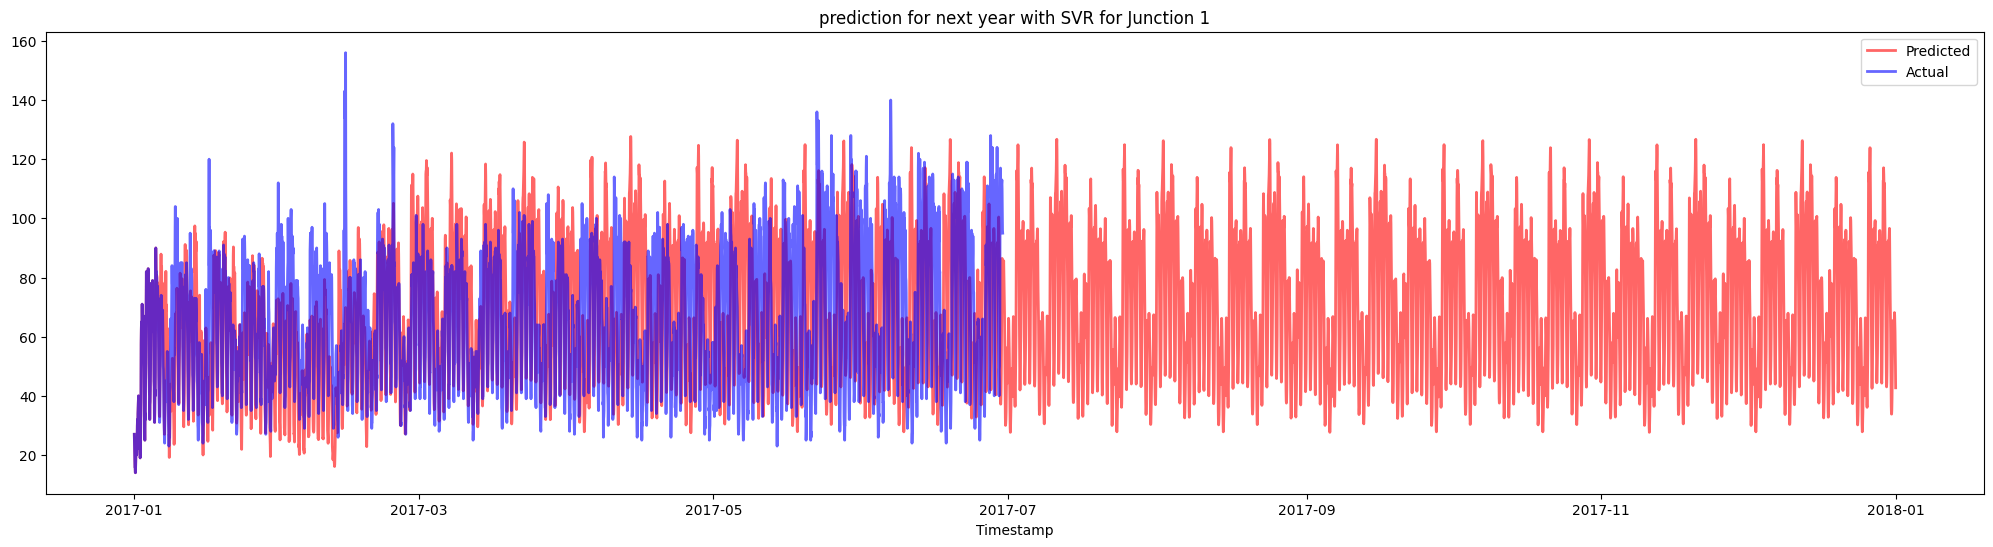

In [23]:
plt.figure(figsize=(25,6))

plt.plot(nextyear_timestamps, nextyear_pred_svr_j1, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(timestamps_6mo, Actual1, color = 'blue', linewidth=2.0, alpha = 0.6)

plt.legend(['Predicted','Actual'])
plt.xlabel('Timestamp')
plt.title("prediction for next year with SVR for Junction 1")
plt.show()

In [54]:
# plt.figure(figsize=(25,6))

# plt.plot(nextyear_timestamps, nextyear_pred_svr_j2, color = 'red', linewidth=2.0, alpha = 0.6)
# plt.plot(timestamps_6mo, Actual2, color = 'blue', linewidth=2.0, alpha = 0.6)

# plt.legend(['Predicted','Actual'])
# plt.xlabel('Timestamp')
# plt.title("prediction for next year with SVR for Junction 2")
# plt.show()

In [25]:
# plt.figure(figsize=(25,6))

# plt.plot(nextyear_timestamps, nextyear_pred_svr_j3, color = 'red', linewidth=2.0, alpha = 0.6)
# plt.plot(timestamps_6mo, Actual3, color = 'blue', linewidth=2.0, alpha = 0.6)

# plt.legend(['Predicted','Actual'])
# plt.xlabel('Timestamp')
# plt.title("prediction for next year with SVR for Junction 3")
# plt.show()

In [26]:
# plt.figure(figsize=(25,6))

# plt.plot(nextyear_timestamps, nextyear_pred_svr_j4, color = 'red', linewidth=2.0, alpha = 0.6)
# plt.plot(timestamps_6mo, Actual4, color = 'blue', linewidth=2.0, alpha = 0.6)

# plt.legend(['Predicted','Actual'])
# plt.xlabel('Timestamp')
# plt.title("prediction for next year with SVR for Junction 4")
# plt.show()

In [27]:
# plt.figure(figsize=(25,6))

# plt.plot(nextyear_timestamps, nextyear_pred_rf_j1, color = 'red', linewidth=2.0, alpha = 0.6)
# plt.plot(timestamps_6mo, Actual1, color = 'blue', linewidth=2.0, alpha = 0.6)

# plt.legend(['Predicted','Actual'])
# plt.xlabel('Timestamp')
# plt.title("prediction for next year with RF for Junction 1")
# plt.show()

In [28]:
# plt.figure(figsize=(25,6))

# plt.plot(nextyear_timestamps, nextyear_pred_rf_j2, color = 'red', linewidth=2.0, alpha = 0.6)
# plt.plot(timestamps_6mo, Actual2, color = 'blue', linewidth=2.0, alpha = 0.6)

# plt.legend(['Predicted','Actual'])
# plt.xlabel('Timestamp')
# plt.title("prediction for next year with RF for Junction 2")
# plt.show()

In [29]:
# plt.figure(figsize=(25,6))

# plt.plot(nextyear_timestamps, nextyear_pred_rf_j3, color = 'red', linewidth=2.0, alpha = 0.6)
# plt.plot(timestamps_6mo, Actual3, color = 'blue', linewidth=2.0, alpha = 0.6)

# plt.legend(['Predicted','Actual'])
# plt.xlabel('Timestamp')
# plt.title("prediction for next year with RF for Junction 3")
# plt.show()

In [30]:
# plt.figure(figsize=(25,6))

# plt.plot(nextyear_timestamps, nextyear_pred_rf_j4, color = 'red', linewidth=2.0, alpha = 0.6)
# plt.plot(timestamps_6mo, Actual4, color = 'blue', linewidth=2.0, alpha = 0.6)

# plt.legend(['Predicted','Actual'])
# plt.xlabel('Timestamp')
# plt.title("prediction for next year with RF for Junction 4")
# plt.show()

In [31]:
# predicting train and test with svr
y_train_pred_svr_j1 = svr1.predict(x_train1).reshape(-1,1)
y_test_pred_svr_j1 = svr1.predict(x_test1).reshape(-1,1)

y_train_pred_svr_j2 = svr2.predict(x_train2).reshape(-1,1)
y_test_pred_svr_j2 = svr2.predict(x_test2).reshape(-1,1)

y_train_pred_svr_j3 = svr3.predict(x_train3).reshape(-1,1)
y_test_pred_svr_j3 = svr3.predict(x_test3).reshape(-1,1)

y_train_pred_svr_j4 = svr4.predict(x_train4).reshape(-1,1)
y_test_pred_svr_j4 = svr4.predict(x_test4).reshape(-1,1)

In [60]:
# predicting train and test with randomforest
y_train_pred_rf_j1 = rf1.predict(x_train1).reshape(-1,1)
y_test_pred_rf_j1 = rf1.predict(x_test1).reshape(-1,1)

y_train_pred_rf_j2 = rf2.predict(x_train2).reshape(-1,1)
y_test_pred_rf_j2 = rf2.predict(x_test2).reshape(-1,1)

y_train_pred_rf_j3 = rf3.predict(x_train3).reshape(-1,1)
y_test_pred_rf_j3 = rf3.predict(x_test3).reshape(-1,1)

y_train_pred_rf_j4 = rf4.predict(x_train4).reshape(-1,1)
y_test_pred_rf_j4 = rf4.predict(x_test4).reshape(-1,1)

In [61]:
# Scaling the svr predictions
y_train_pred_svr_j1 = scaler1.inverse_transform(y_train_pred_svr_j1)
y_test_pred_svr_j1 = scaler1.inverse_transform(y_test_pred_svr_j1)

y_train_pred_svr_j2 = scaler2.inverse_transform(y_train_pred_svr_j2)
y_test_pred_svr_j2 = scaler2.inverse_transform(y_test_pred_svr_j2)

y_train_pred_svr_j3 = scaler3.inverse_transform(y_train_pred_svr_j3)
y_test_pred_svr_j3 = scaler3.inverse_transform(y_test_pred_svr_j3)

y_train_pred_svr_j4 = scaler4.inverse_transform(y_train_pred_svr_j4)
y_test_pred_svr_j4 = scaler4.inverse_transform(y_test_pred_svr_j4)


In [34]:
# Scaling the randomforest predictions

y_train_pred_rf_j1 = scaler1.inverse_transform(y_train_pred_rf_j1)
y_test_pred_rf_j1 = scaler1.inverse_transform(y_test_pred_rf_j1)

y_train_pred_rf_j2 = scaler2.inverse_transform(y_train_pred_rf_j2)
y_test_pred_rf_j2 = scaler2.inverse_transform(y_test_pred_rf_j2)

y_train_pred_rf_j3 = scaler3.inverse_transform(y_train_pred_rf_j3)
y_test_pred_rf_j3 = scaler3.inverse_transform(y_test_pred_rf_j3)

y_train_pred_rf_j4 = scaler4.inverse_transform(y_train_pred_rf_j4)
y_test_pred_rf_j4 = scaler4.inverse_transform(y_test_pred_rf_j4)

In [35]:
# Scaling the actual values
y_train1 = scaler1.inverse_transform(y_train1)
y_test1 = scaler1.inverse_transform(y_test1)

y_train2 = scaler2.inverse_transform(y_train2)
y_test2 = scaler2.inverse_transform(y_test2)

y_train3 = scaler3.inverse_transform(y_train3)
y_test3 = scaler3.inverse_transform(y_test3)

y_train4 = scaler4.inverse_transform(y_train4)
y_test4 = scaler4.inverse_transform(y_test4)

In [36]:
train_timestamps = df1.index[timesteps-1:]
test_timestamps = df1[test_start_dt:].index[timesteps-1:]

train_timestamps4 = df4.index[timesteps-1:]
test_timestamps4 = df4['2017-06-15 00:00:00':].index[timesteps-1:]


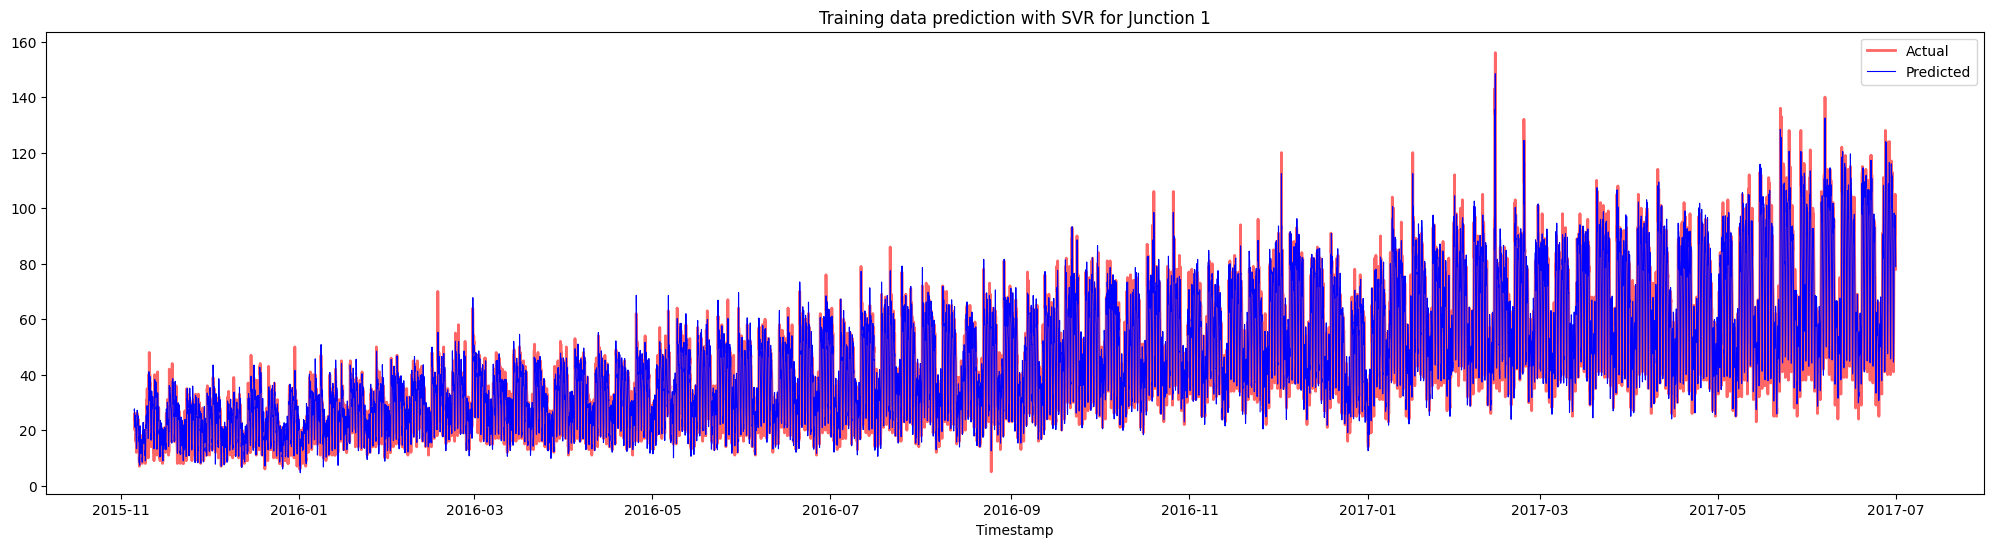

In [37]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps, y_train1, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_pred_svr_j1, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction with SVR for Junction 1")
plt.show()

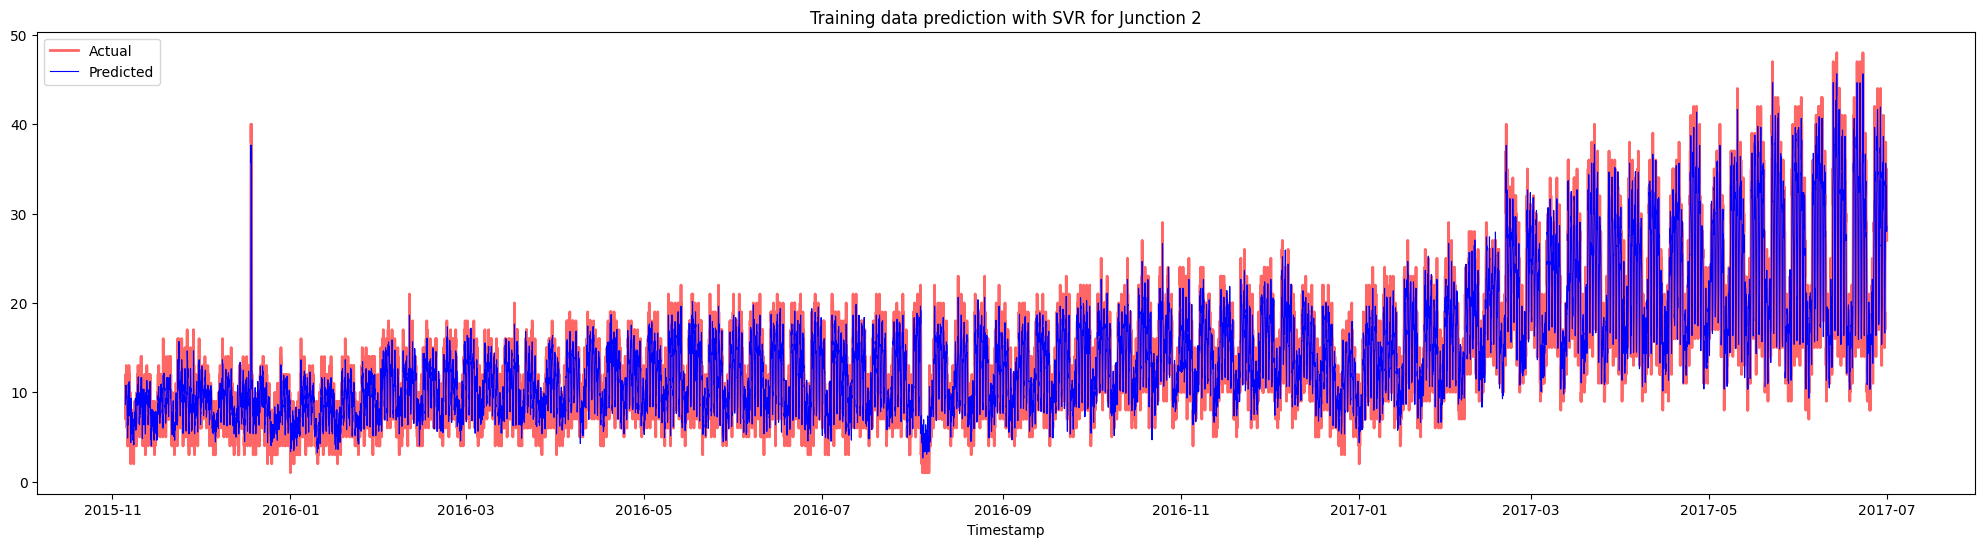

In [38]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps, y_train2, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_pred_svr_j2, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction with SVR for Junction 2")
plt.show()

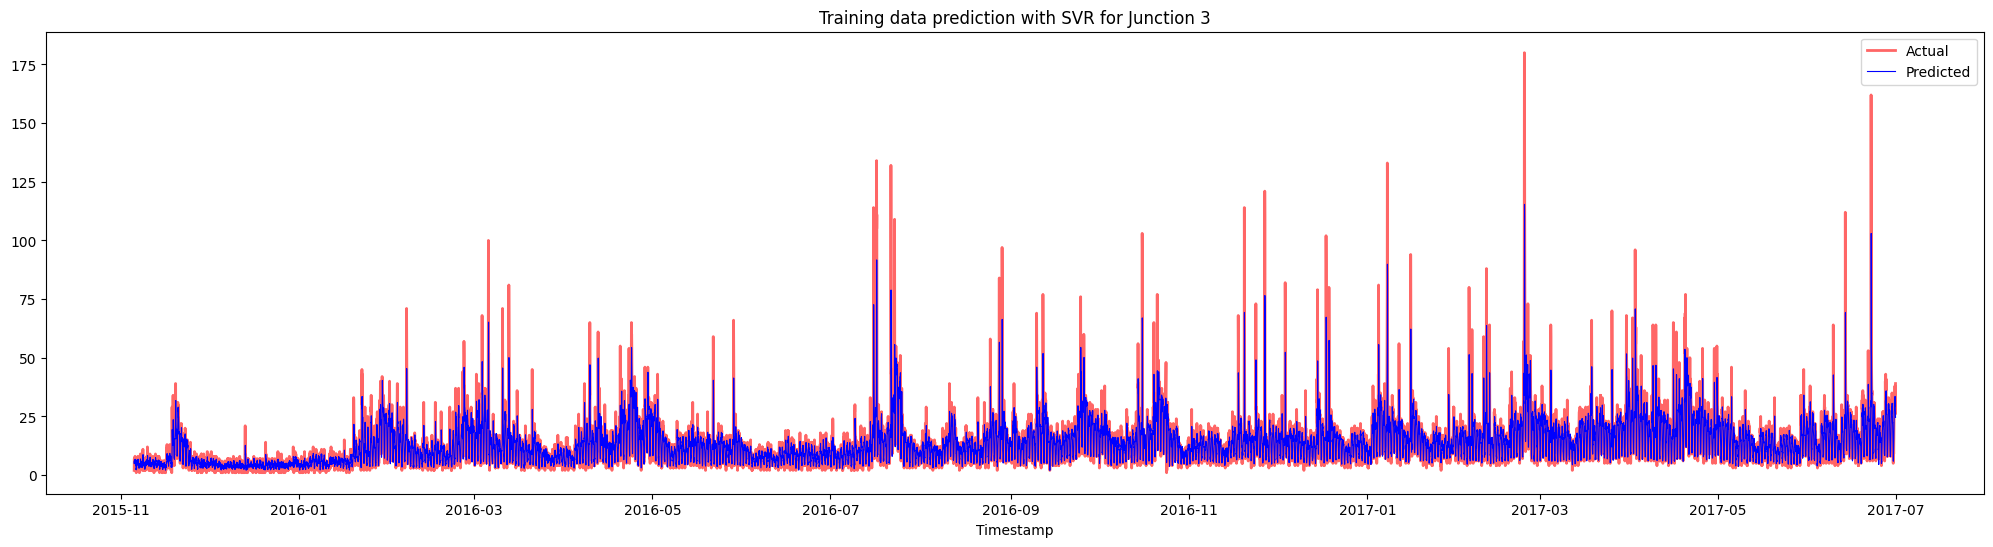

In [39]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps, y_train3, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_pred_svr_j3, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction with SVR for Junction 3")
plt.show()

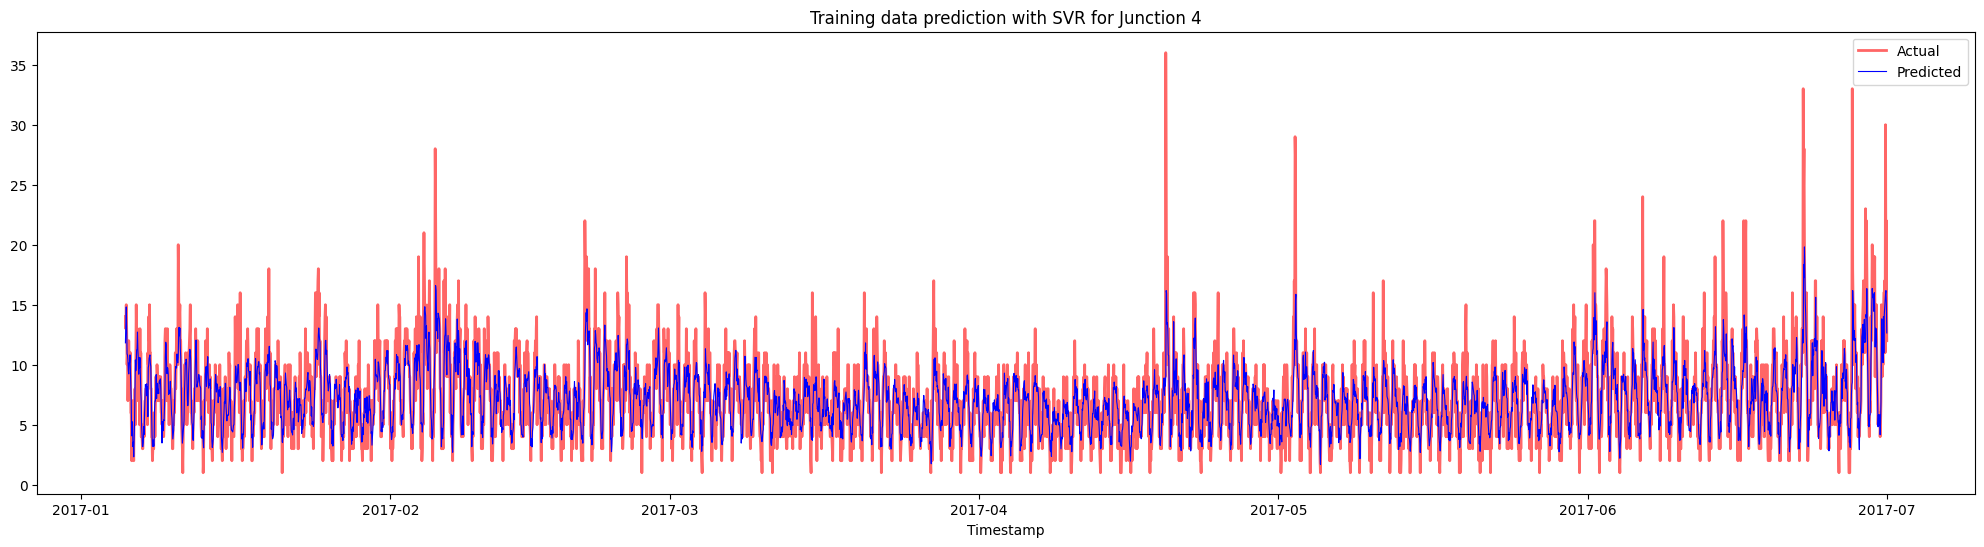

In [40]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps4, y_train4, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps4, y_train_pred_svr_j4, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction with SVR for Junction 4")
plt.show()

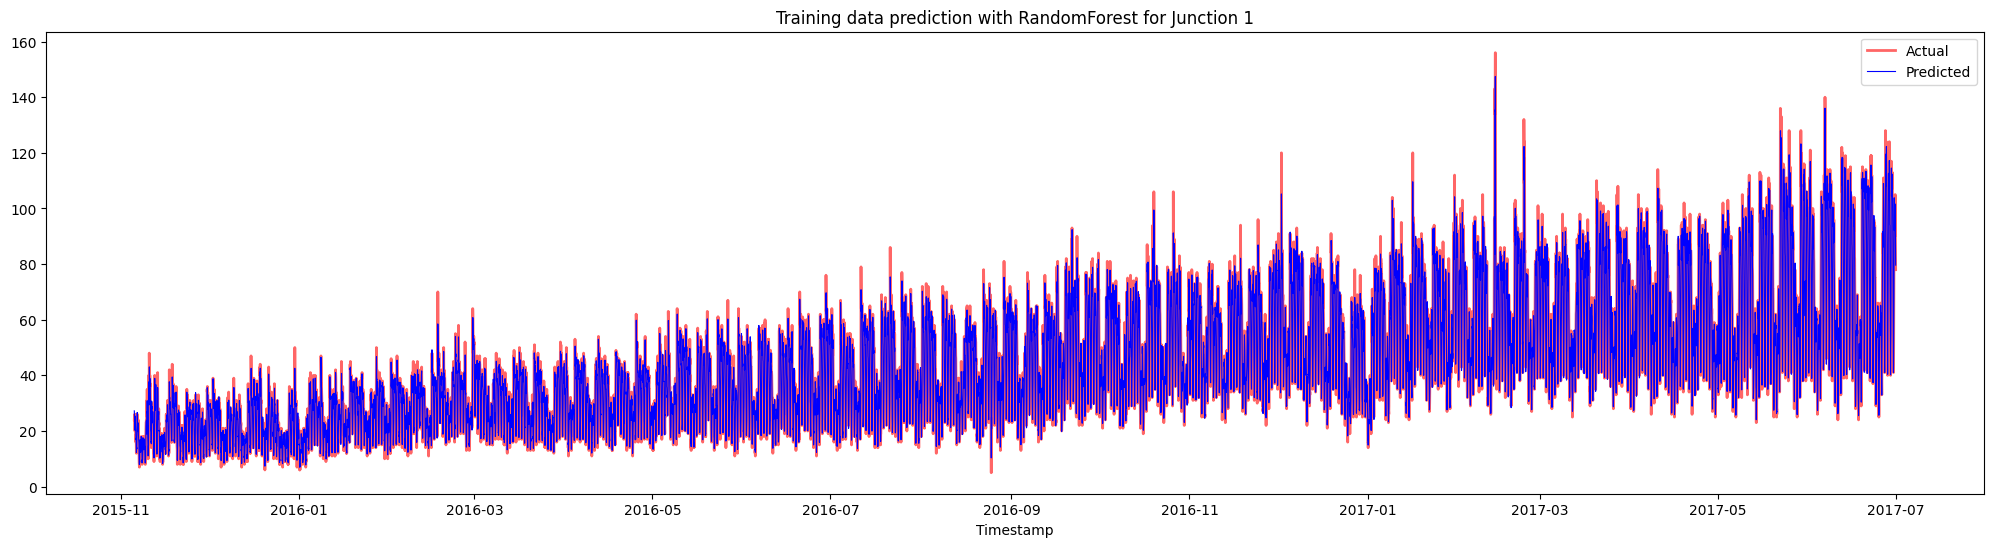

In [41]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps, y_train1, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_pred_rf_j1, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction with RandomForest for Junction 1")
plt.show()

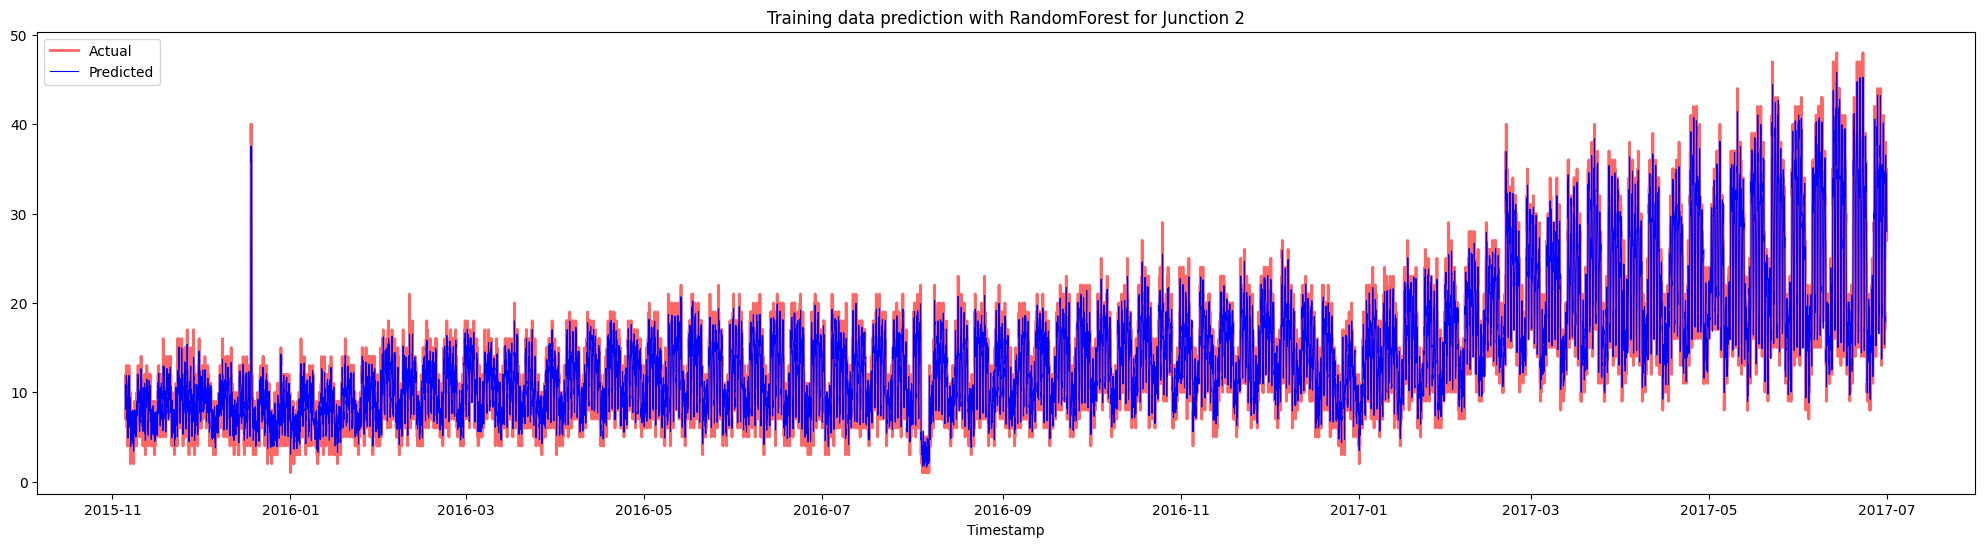

In [42]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps, y_train2, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_pred_rf_j2, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction with RandomForest for Junction 2")
plt.show()

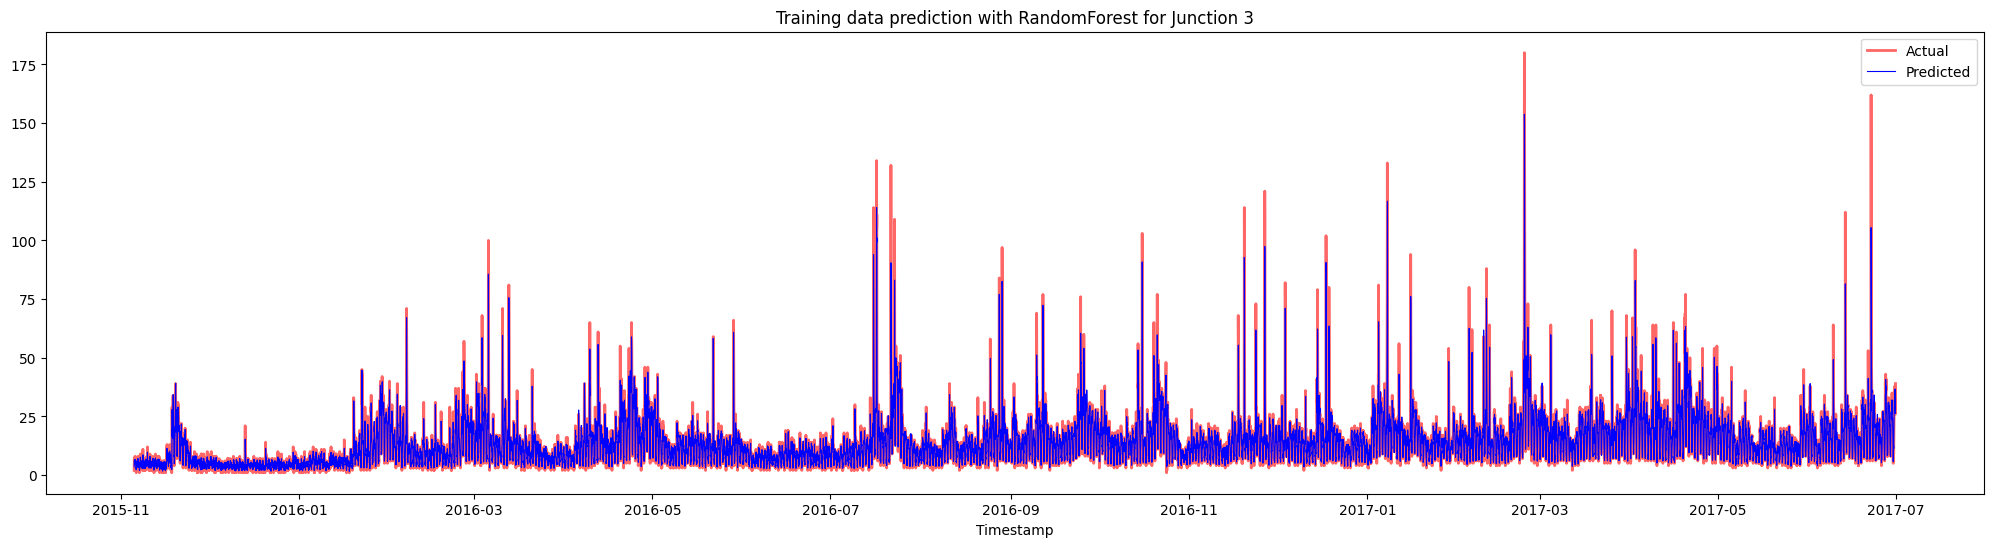

In [43]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps, y_train3, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_pred_rf_j3, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction with RandomForest for Junction 3")
plt.show()

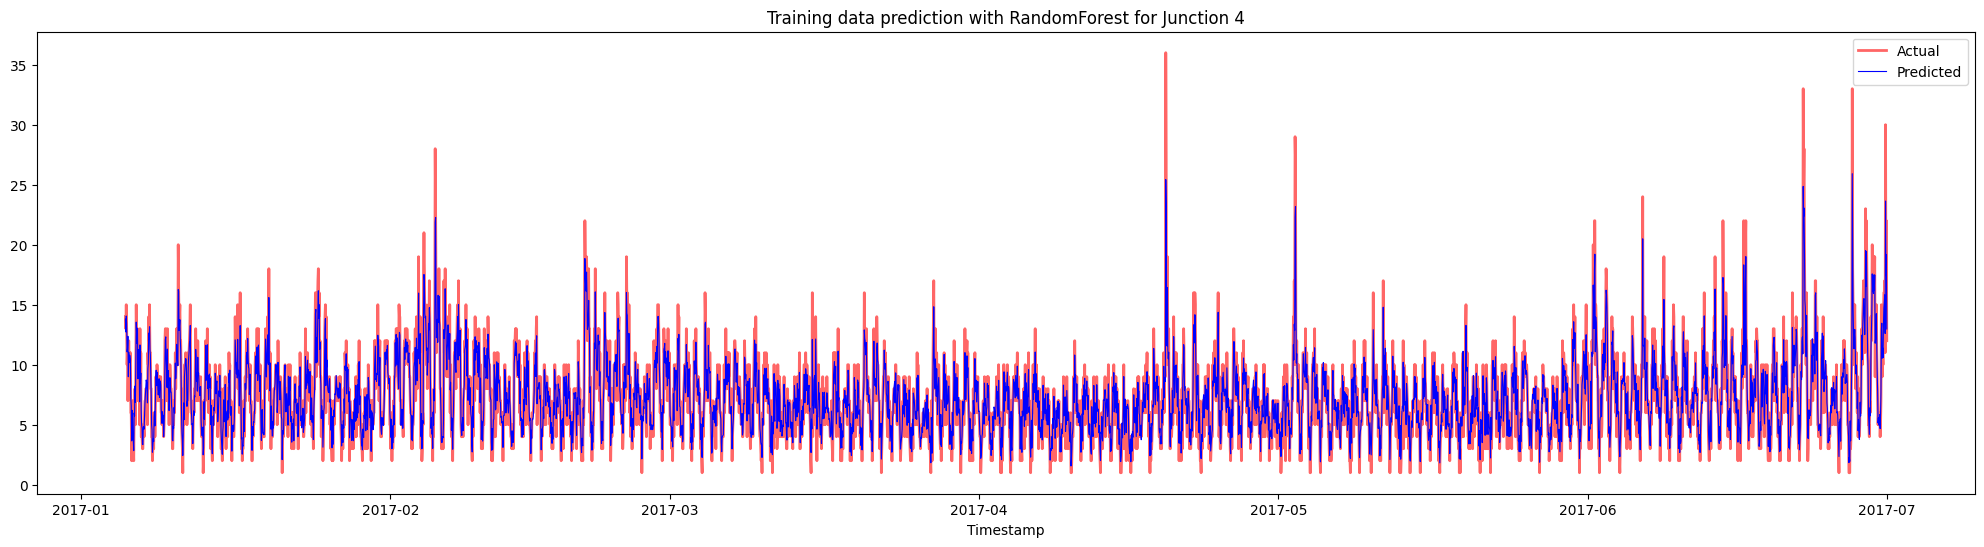

In [44]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps4, y_train4, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps4, y_train_pred_rf_j4, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction with RandomForest for Junction 4")
plt.show()

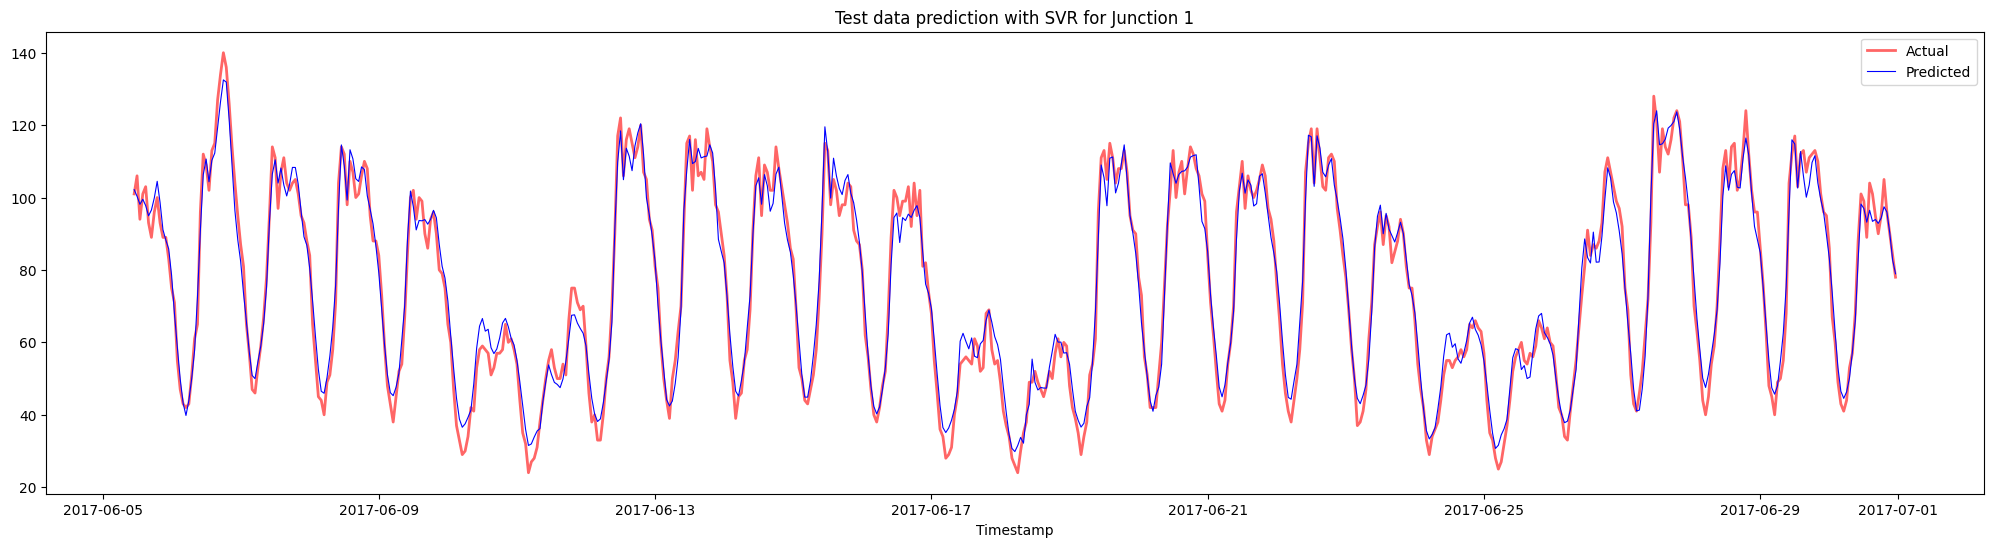

In [45]:
plt.figure(figsize=(25,6))
plt.plot(test_timestamps, y_test1, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred_svr_j1, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Test data prediction with SVR for Junction 1")
plt.show()

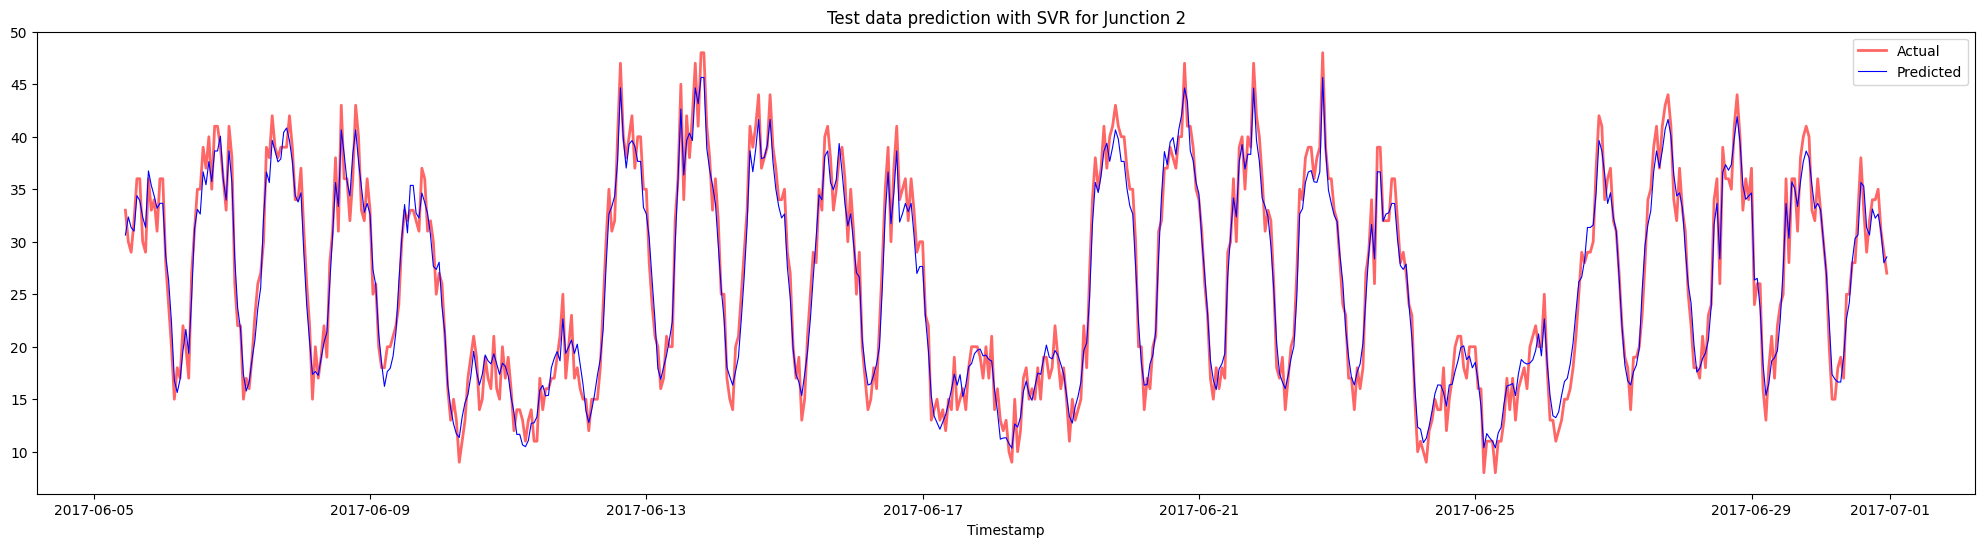

In [46]:
plt.figure(figsize=(25,6))
plt.plot(test_timestamps, y_test2, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred_svr_j2, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Test data prediction with SVR for Junction 2")
plt.show()

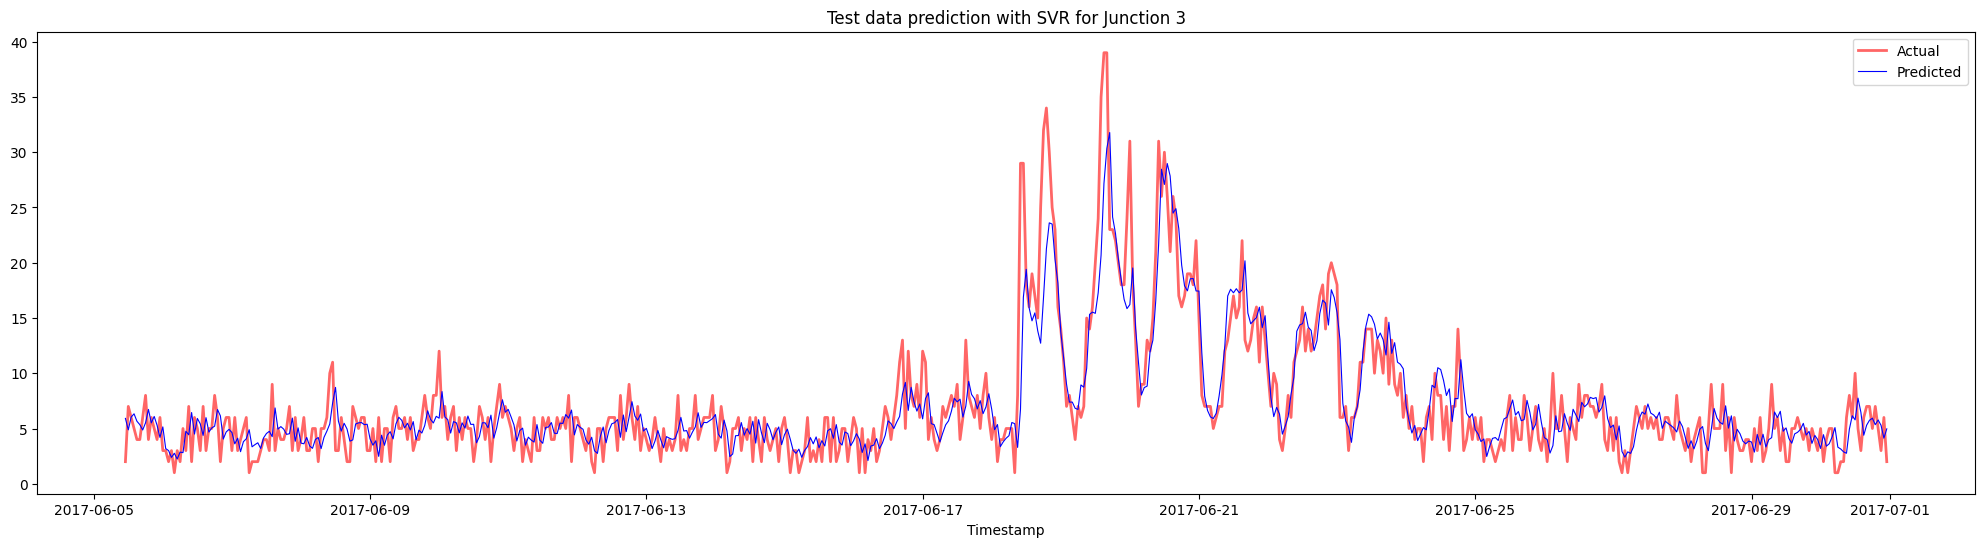

In [47]:
plt.figure(figsize=(25,6))
plt.plot(test_timestamps, y_test3, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred_svr_j3, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Test data prediction with SVR for Junction 3")
plt.show()

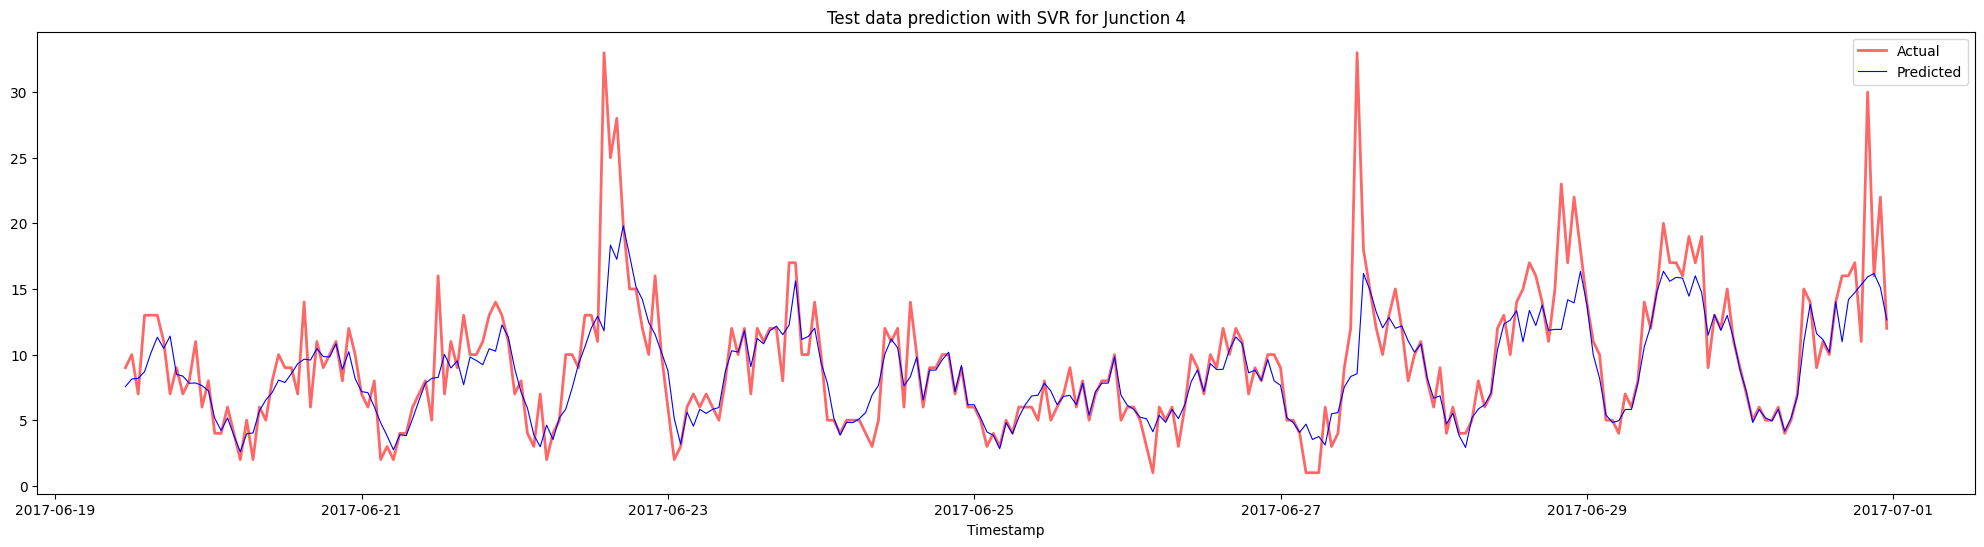

In [48]:
plt.figure(figsize=(25,6))
plt.plot(test_timestamps4, y_test4, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps4, y_test_pred_svr_j4, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Test data prediction with SVR for Junction 4")
plt.show()

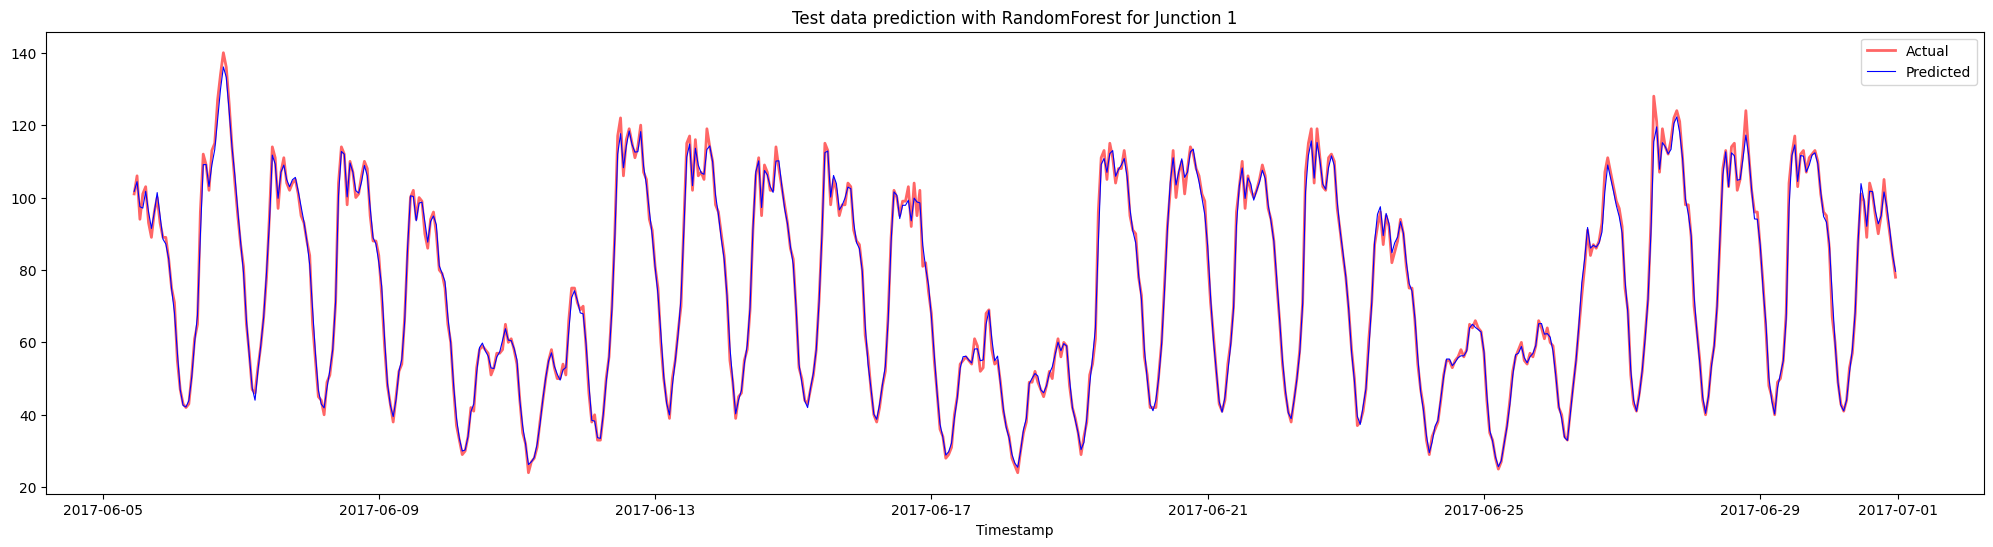

In [49]:
plt.figure(figsize=(25,6))
plt.plot(test_timestamps, y_test1, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred_rf_j1, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Test data prediction with RandomForest for Junction 1")
plt.show()

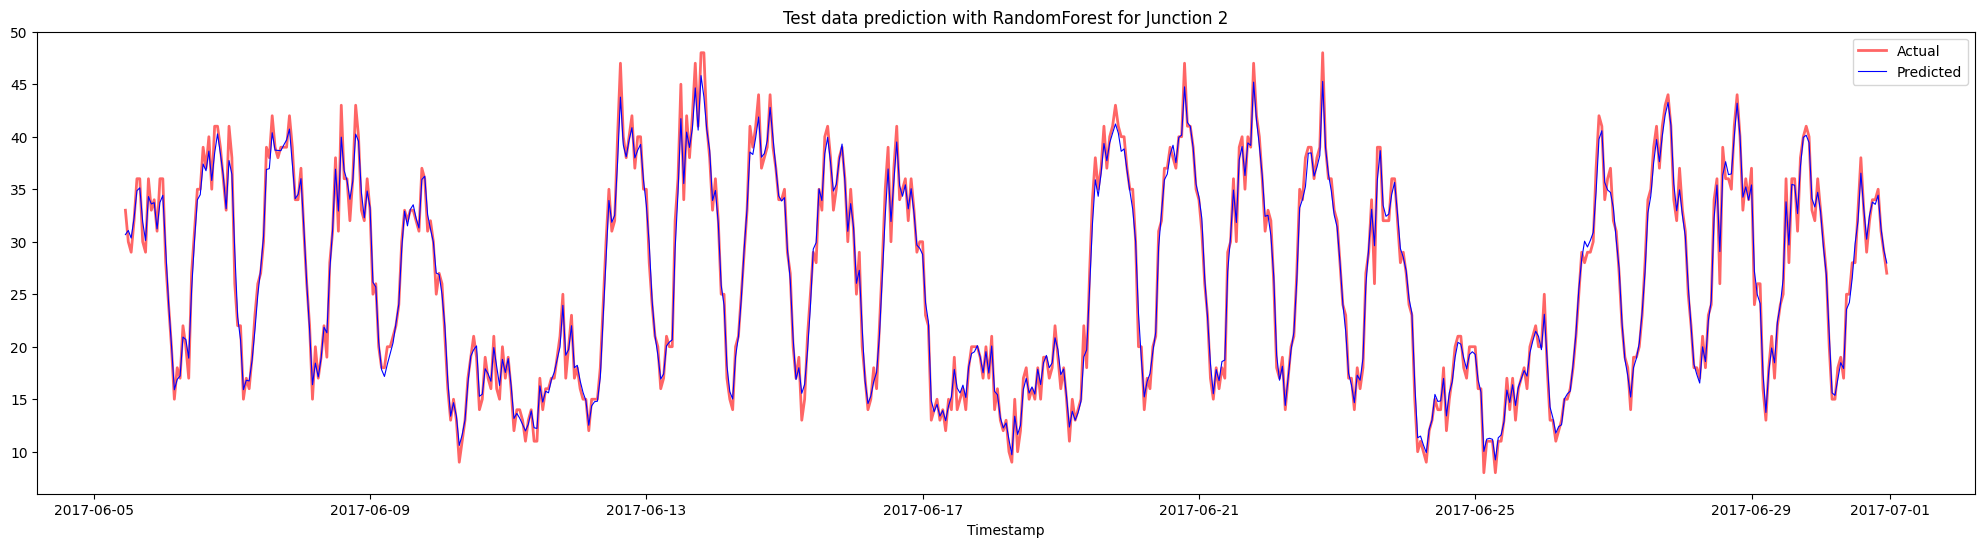

In [50]:
plt.figure(figsize=(25,6))
plt.plot(test_timestamps, y_test2, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred_rf_j2, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Test data prediction with RandomForest for Junction 2")
plt.show()

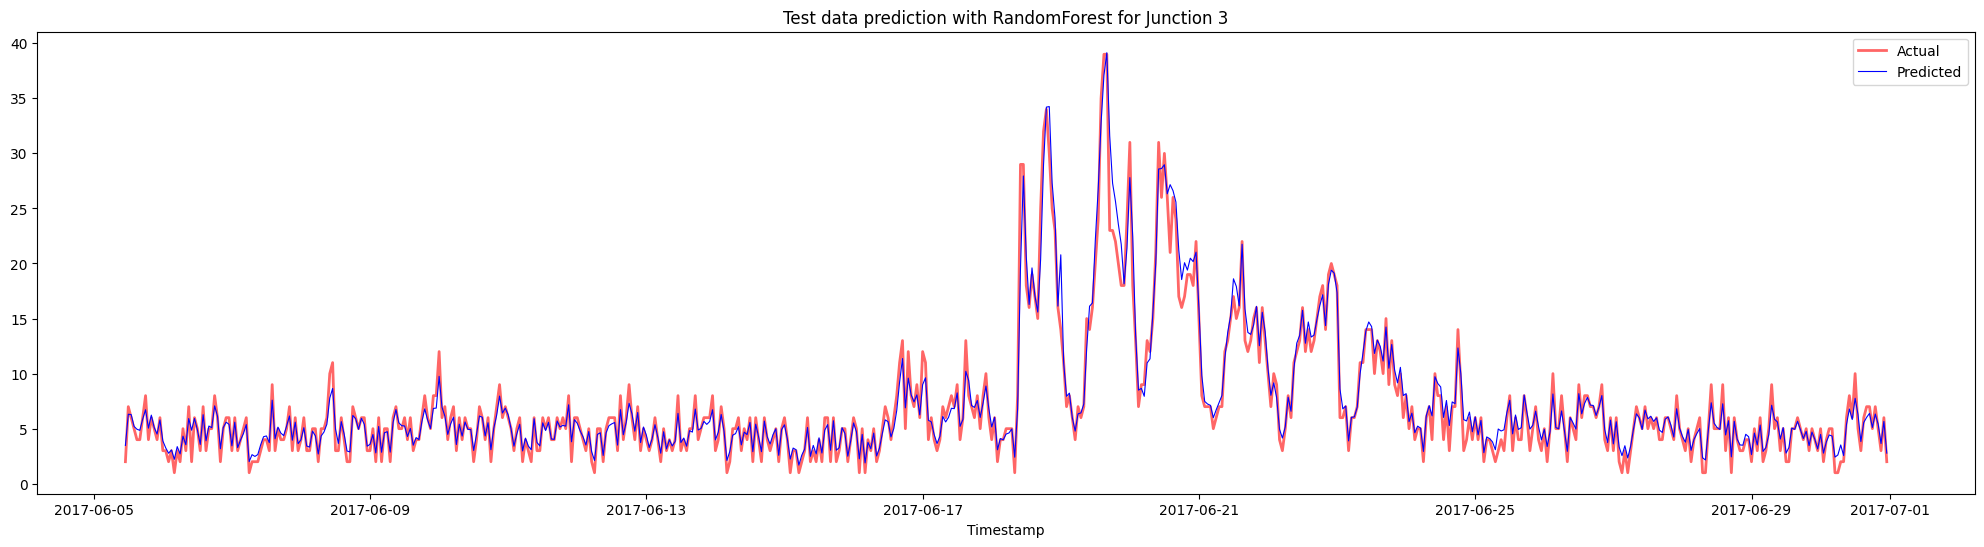

In [51]:
plt.figure(figsize=(25,6))
plt.plot(test_timestamps, y_test3, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred_rf_j3, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Test data prediction with RandomForest for Junction 3")
plt.show()

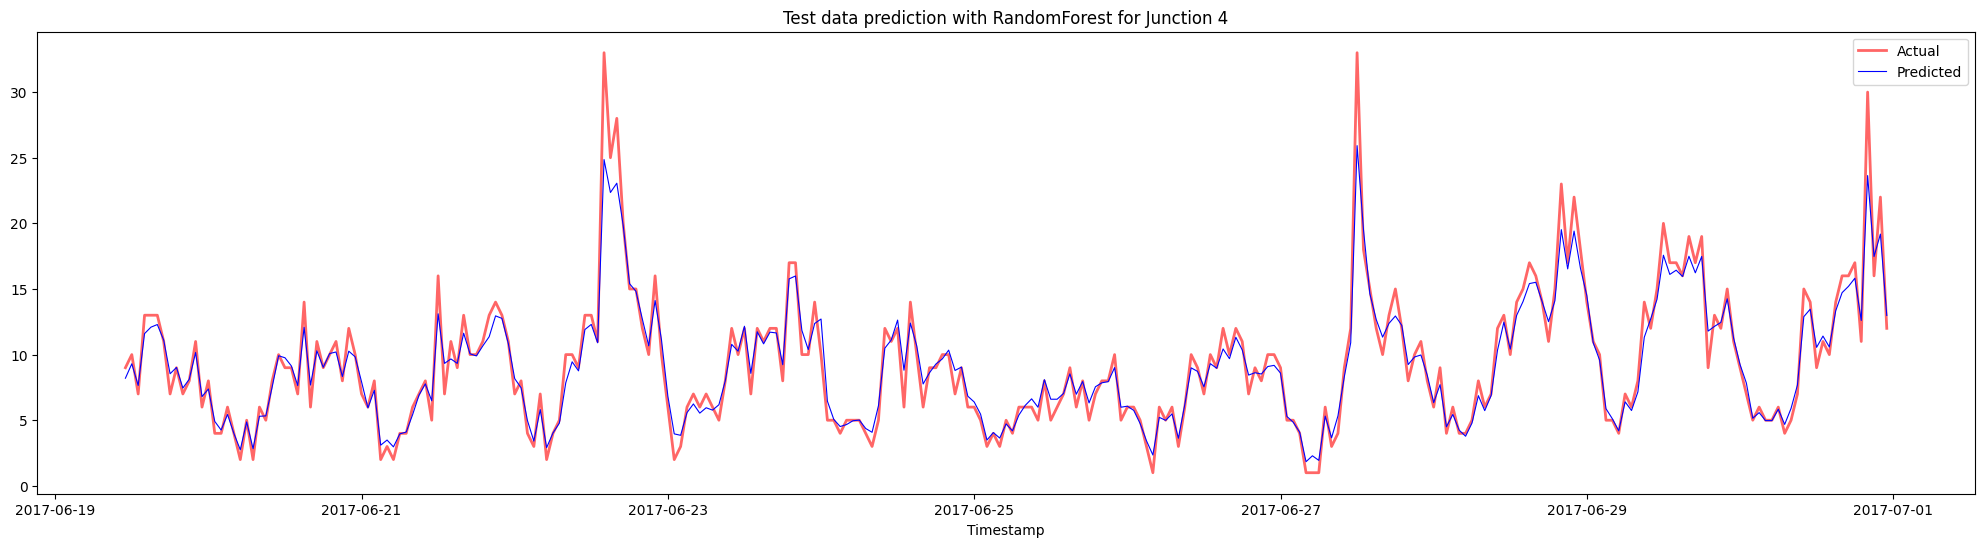

In [52]:
plt.figure(figsize=(25,6))
plt.plot(test_timestamps4, y_test4, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps4, y_test_pred_rf_j4, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Test data prediction with RandomForest for Junction 4")
plt.show()